https://medium.com/i̇stanbuldatascienceacademy/house-prices-prediction-using-regression-model-and-web-scraping-8791199635b6

In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import time
import sys

In [3]:
def getAndParseURL(url):
    result = requests.get(url,headers={"User-Agent":"Opera/94.0.0.0"})  #     Mozilla/5.0
    soup = bts(result.text, 'html.parser')
    return soup

In [4]:
PAGE_NUM = []
def find_page_num():

    html = getAndParseURL("https://www.zingat.com/kadikoy-satilik-daire")
    for i in range(1,43):
        PAGE_NUM.append("https://www.zingat.com/kadikoy-satilik-daire" + "?page=" + str(i))
    return PAGE_NUM
find_page_num()

['https://www.zingat.com/kadikoy-satilik-daire?page=1',
 'https://www.zingat.com/kadikoy-satilik-daire?page=2',
 'https://www.zingat.com/kadikoy-satilik-daire?page=3',
 'https://www.zingat.com/kadikoy-satilik-daire?page=4',
 'https://www.zingat.com/kadikoy-satilik-daire?page=5',
 'https://www.zingat.com/kadikoy-satilik-daire?page=6',
 'https://www.zingat.com/kadikoy-satilik-daire?page=7',
 'https://www.zingat.com/kadikoy-satilik-daire?page=8',
 'https://www.zingat.com/kadikoy-satilik-daire?page=9',
 'https://www.zingat.com/kadikoy-satilik-daire?page=10',
 'https://www.zingat.com/kadikoy-satilik-daire?page=11',
 'https://www.zingat.com/kadikoy-satilik-daire?page=12',
 'https://www.zingat.com/kadikoy-satilik-daire?page=13',
 'https://www.zingat.com/kadikoy-satilik-daire?page=14',
 'https://www.zingat.com/kadikoy-satilik-daire?page=15',
 'https://www.zingat.com/kadikoy-satilik-daire?page=16',
 'https://www.zingat.com/kadikoy-satilik-daire?page=17',
 'https://www.zingat.com/kadikoy-satilik

In [5]:
ALL_PRODUCT = []
def all_product():
    for i in PAGE_NUM[::]:
        html = getAndParseURL(i)
        for result in html.findAll("a",{"class":"zl-card-inner"}):
            ALL_PRODUCT.append("https://www.zingat.com" + result.get("href"))
    return ALL_PRODUCT
all_product()

['https://www.zingat.com/erenkoy-sevgili-residanceda-havuzlu-guvenlikli-137-m2-3-1-4538899i',
 'https://www.zingat.com/fenerbahce-sahilde-cok-ferah-4-2-terasli-dublex-daire-4538901i',
 'https://www.zingat.com/tepegoz-sokak-nural-kosku-konutlari-sitesinde-4-1-satilik-daire-4539948i',
 'https://www.zingat.com/ethem-efendi-caddesinde-net-80-m2-sifir-2-1-balkonlu-daire-4625197i',
 'https://www.zingat.com/kiziltoprak-cumhur-sokakta-balkonlu-otoparkli-3-1-satilik-daire-4303369i',
 'https://www.zingat.com/kadikoy-fikirtepe-teknik-yapi-concord-full-esyali-satilik-1-1-4553649i',
 'https://www.zingat.com/acibademde-deprem-sonrasi-2008-yapimi-k-otoparkli-4-1dubleks-4490478i',
 'https://www.zingat.com/kadikoy-merdivenkoyde-satilik-sifir-daire-4490952i',
 'https://www.zingat.com/caddebostan-sahilde-dinamikten-300m2-deniz-manzarali-terasli-4091507i',
 'https://www.zingat.com/erenkoyde-site-icinde-guvenlikli-170m2-2-balkonlu-ultra-luks-4581534i',
 'https://www.zingat.com/kadikoy-kadife-sokakta-yuksek

In [6]:
RESULT = []
for rslt in ALL_PRODUCT[:]:

    html = getAndParseURL(rslt)
    house_description = html.find("div", {"class":"col-xs-12"}).h1.text
    neighborhood = html.find("div", {"class":"detail-location-path"}).h2.text.replace("Kadıköy\n","").replace("İstanbul","").replace(",","").strip()
    price = html.find("div", {"class":"col-md-3 price-info-text"}).find("strong",{"itemprop":"price"}).text.replace("TL","").strip()
    net_m2 = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[1].find("span").text.replace("m²","").strip()
    gross_m2 = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[2].find("span").text.replace("m²","").strip()
    room_livingroom = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[3].find("span").text.strip()
    room = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[3].find("span").text.strip()[0]
    living_room = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[3].find("span").text.strip()   #[2]
    bathroom = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[4].find("span").text.strip()
    photo = html.find("div", {"class":"detail-images-slide-container hidden-xs hidden-sm"}).a.span.text.replace("+","")
    
    RESULT.append([house_description,neighborhood,price,net_m2,gross_m2,room_livingroom,room,living_room,bathroom,photo])
    
columns = ["İLAN ADI","MAHALLE", "FİYAT","NET(m²)","BRÜT(m²)","ODA-SALON SAYISI","ODA SAYISI","SALON SAYISI","BANYO SAYISI","FOTOĞRAF SAYISI"]
df = pd.DataFrame.from_records(RESULT, columns=columns)

In [7]:
df.to_csv("ZingatHousePricePrediction.csv")  # , encoding="ANSI"

In [8]:
df.head()

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
0,"Erenköy Sevgili Residance'da havuzlu,güvenlikl...",Erenköy,13.950.000,100,137,3+1,3,3+1,2,31
1,Fenerbahçe Sahilde çok ferah 4+2 teraslı duble...,Fenerbahçe,19.500.000,203,230,4+2,4,4+2,2,31
2,GÖZTEPE TEPEGÖZ SOKAK NURAL KÖŞKÜ K.SİTESİ'NDE...,Göztepe,14.000.000,180,225,4+1,4,4+1,2,36
3,Ethem Efendi Caddesi'nde Net 80 m2 Sıfır 2+1 B...,Erenköy,7.300.000,80,100,2+1,2,2+1,2,8
4,"ZÜHTÜPAŞA BAĞDAT CAD'NE YAKIN, BOŞ, BALKONLU 3...",Zühtüpaşa,5.450.000,93,120,3+1,3,3+1,1,28


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   İLAN ADI          882 non-null    object
 1   MAHALLE           882 non-null    object
 2   FİYAT             882 non-null    object
 3   NET(m²)           882 non-null    object
 4   BRÜT(m²)          882 non-null    object
 5   ODA-SALON SAYISI  882 non-null    object
 6   ODA SAYISI        882 non-null    object
 7   SALON SAYISI      882 non-null    object
 8   BANYO SAYISI      882 non-null    object
 9   FOTOĞRAF SAYISI   882 non-null    object
dtypes: object(10)
memory usage: 69.0+ KB


In [10]:
df.isnull().sum()

İLAN ADI            0
MAHALLE             0
FİYAT               0
NET(m²)             0
BRÜT(m²)            0
ODA-SALON SAYISI    0
ODA SAYISI          0
SALON SAYISI        0
BANYO SAYISI        0
FOTOĞRAF SAYISI     0
dtype: int64

In [11]:
df.MAHALLE.unique()

array(['Erenköy', 'Fenerbahçe', 'Göztepe', 'Zühtüpaşa', 'Dumlupınar',
       'Acıbadem', 'Merdivenköy', 'Caddebostan', 'Caferağa', 'Eğitim',
       'Suadiye', 'Bostancı', 'Feneryolu', 'Sahrayı Cedit', 'Rasimpaşa',
       'Fikirtepe', 'Kozyatağı', 'Osmanağa', 'Hasanpaşa', '19 Mayıs',
       'Koşuyolu'], dtype=object)

In [12]:
df["ODA SAYISI"].value_counts(dropna = False)

3    428
4    179
2    159
1     42
5     40
7     16
6      7
9      4
0      3
E      2
Y      1
8      1
Name: ODA SAYISI, dtype: int64

In [13]:
df["ODA SAYISI"]=df["ODA SAYISI"].str.replace('E','UNKNOWN')
df["ODA SAYISI"]=df["ODA SAYISI"].str.replace('Y','UNKNOWN')
df["ODA SAYISI"].value_counts(dropna=False)

3          428
4          179
2          159
1           42
5           40
7           16
6            7
9            4
UNKNOWN      3
0            3
8            1
Name: ODA SAYISI, dtype: int64

In [14]:
df[df["ODA SAYISI"] == "UNKNOWN"]

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
293,ACIBADEM YÖR PALAS'DA SATILIK AKILLI LÜKS 4+1 ...,Acıbadem,21.000.000,172,207,Evet,UNKNOWN,Evet,0 TL (aylık),17
298,ACIBADEM YÖR PALAS'DA SATILIK AKILLI LÜKS 3+1 ...,Acıbadem,11.000.000,107,127,Evet,UNKNOWN,Evet,0 TL (aylık),16
363,KADIKÖY YELDEĞİRMENİ'NDE 2+1 SATILIK YATIRIMLI...,Rasimpaşa,2.100.000,60,70,Yok,UNKNOWN,Yok,1,7


In [15]:
df.drop([293, 298, 363], inplace=True)

In [522]:
df["BRÜT(m²)"] = df["BRÜT(m²)"].apply(lambda x : str(x).replace("UNKNOWN", "0")).astype(int)

ValueError: invalid literal for int() with base 10: '665  TL  (aylık)'

df["ODA SAYISI"]=df["ODA SAYISI"].str.replace('E','UNKNOWN')
df["ODA SAYISI"]=df["ODA SAYISI"].str.replace('Y','UNKNOWN')
df["ODA SAYISI"].value_counts()

In [ ]:
df["SALON SAYISI"].value_counts(dropna = False)

3+1                 412
2+1                 154
4+1                 153
1+1                  27
4+2                  20
5+2                  19
5+1                  18
7                    12
3+2                  12
4                     9
10-20 arası           9
6+1                   5
9                     5
1+0 (Stüdyo)          3
10                    3
0  TL  (aylık)        3
7+1                   3
3                     3
Evet                  2
2+2                   2
7+2                   1
6+2                   1
20 ve üzeri           1
500  TL  (aylık)      1
6                     1
8                     1
Yok                   1
5                     1
Name: SALON SAYISI, dtype: int64

In [ ]:
df["SALON SAYISI"]=df["SALON SAYISI"].replace({'10-20 arası':'UNKNOWN','0  TL  (aylık)':'UNKNOWN','Kombi (Doğalgaz)':'UNKNOWN','0  TL  (aylık)':'UNKNOWN', '20 ve üzeri':'UNKNOWN', '500  TL  (aylık)':'UNKNOWN', 'Evet':'UNKNOWN', 'Yok':'UNKNOWN', '1+0 (Stüdyo)':'1+0'})

In [ ]:
df["SALON SAYISI"].value_counts()

3+1        412
2+1        154
4+1        153
1+1         27
4+2         20
5+2         19
5+1         18
UNKNOWN     17
7           12
3+2         12
4            9
6+1          5
9            5
1+0          3
7+1          3
3            3
10           3
2+2          2
8            1
6            1
6+2          1
7+2          1
5            1
Name: SALON SAYISI, dtype: int64

df["SALON SAYISI"]=df["SALON SAYISI"].str.replace('10-20 arası','UNKNOWN')
df["SALON SAYISI"]=df["SALON SAYISI"].str.replace('0  TL  (aylık)','UNKNOWN')
df["SALON SAYISI"]=df["SALON SAYISI"].str.replace('Evet','UNKNOWN')
df["SALON SAYISI"]=df["SALON SAYISI"].str.replace('20 ve üzeri','UNKNOWN')
df["SALON SAYISI"]=df["SALON SAYISI"].str.replace('500  TL  (aylık)','UNKNOWN')
df["SALON SAYISI"]=df["SALON SAYISI"].str.replace('Yok','UNKNOWN')
df["SALON SAYISI"]=df["SALON SAYISI"].str.replace('1+0 (Stüdyo)','1+0')
df["SALON SAYISI"].value_counts()

In [ ]:
df[df["SALON SAYISI"] == "UNKNOWN"]

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
280,ACIBADEM YÖR PALAS'DA SATILIK AKILLI LÜKS 4+1 ...,Acıbadem,21.000.000,172,207,Evet,UNKNOWN,UNKNOWN,0 TL (aylık),17
285,ACIBADEM YÖR PALAS'DA SATILIK AKILLI LÜKS 3+1 ...,Acıbadem,11.000.000,107,127,Evet,UNKNOWN,UNKNOWN,0 TL (aylık),16
350,KADIKÖY YELDEĞİRMENİ'NDE 2+1 SATILIK YATIRIMLI...,Rasimpaşa,2.100.000,60,70,Yok,UNKNOWN,UNKNOWN,1,7
399,"İSKANLI, BALKONLU, 3+1 SATILIK DAİRE (Yabancı ...",Bostancı,5.750.000,100,135,500 TL (aylık),5,UNKNOWN,0 TL (aylık),23
412,NOVACADDE'DEN BOSTANCI SENESENEVLER'DE PROJEDE...,Bostancı,6.000.000,96,135,0 TL (aylık),0,UNKNOWN,0 TL (aylık),
445,KADIKÖY FENER YOLU MAHALLESİNDE YENİ BİNA LÜKS...,Feneryolu,8.250.000,94,120,0 TL (aylık),0,UNKNOWN,0 TL (aylık),24
600,ŞAŞKIN BAKKAL SAHİLDE KATTA TEK SIFIR 117 m2 N...,Caddebostan,18.500.000,117,150,10-20 arası,1,UNKNOWN,Klima,32
601,TÜTÜNCÜ MEHMET EFENDİ DE MANZARALI SATILIK DUB...,Göztepe,19.000.000,180,220,10-20 arası,1,UNKNOWN,Klima,22
603,AKDENİZ CADDE SİTESİNDE DENİZ MANZARALI SATILI...,Bostancı,14.900.000,105,150,10-20 arası,1,UNKNOWN,Klima,36
605,SUADİYE DEKON AMETİST'TE SATILIK FULL DENİZ MA...,Suadiye,18.000.000,189,233,10-20 arası,1,UNKNOWN,Klima,31


In [ ]:
df.drop([280,285,350,399,412,445,600,601,603,605,607,621,627,640,641,659,749], inplace=True)

In [ ]:
df["SALON SAYISI_2"] = df["SALON SAYISI"].str.extract(r'(\d+)\s+(\d+)')[1]


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
877    NaN
878    NaN
879    NaN
880    NaN
881    NaN
Name: SALON SAYISI_2, Length: 865, dtype: object

In [ ]:
df.head()

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI,SALON SAYISI_2,ODA SAYISI_2
0,GÖZTEPE TEPEGÖZ SOKAK NURAL KÖŞKÜ K.SİTESİ'NDE...,Göztepe,14.000.000,180,225,4+1,4,4+1,2,36,NaN,4
1,Ethem Efendi Caddesi'nde Net 80 m2 Sıfır 2+1 B...,Erenköy,7.300.000,80,100,2+1,2,2+1,2,8,NaN,2
2,"ZÜHTÜPAŞA BAĞDAT CAD'NE YAKIN, BOŞ, BALKONLU 3...",Zühtüpaşa,5.450.000,93,120,3+1,3,3+1,1,28,NaN,3
3,KADIKÖY FİKİRTEPE TEKNİK YAPI CONCORD FULL EŞY...,Dumlupınar,3.000.000,37,48,1+1,1,1+1,1,9,NaN,1
4,SUADİYE BAĞDATA YAKIN 5 YILLIK YENİ 95M2 BALKO...,Suadiye,7.200.000,75,95,2+1,2,2+1,1,31,NaN,2


In [ ]:
df["ODA SAYISI_2"] = df["SALON SAYISI"].str.extract('(\d+)')
df["ODA SAYISI_2"]

0      4
1      2
2      3
3      1
4      2
      ..
877    4
878    3
879    4
880    4
881    3
Name: ODA SAYISI_2, Length: 865, dtype: object

In [ ]:
df.head()

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI,SALON SAYISI_2,ODA SAYISI_2
0,GÖZTEPE TEPEGÖZ SOKAK NURAL KÖŞKÜ K.SİTESİ'NDE...,Göztepe,14.000.000,180,225,4+1,4,4+1,2,36,4,4
1,Ethem Efendi Caddesi'nde Net 80 m2 Sıfır 2+1 B...,Erenköy,7.300.000,80,100,2+1,2,2+1,2,8,2,2
2,"ZÜHTÜPAŞA BAĞDAT CAD'NE YAKIN, BOŞ, BALKONLU 3...",Zühtüpaşa,5.450.000,93,120,3+1,3,3+1,1,28,3,3
3,KADIKÖY FİKİRTEPE TEKNİK YAPI CONCORD FULL EŞY...,Dumlupınar,3.000.000,37,48,1+1,1,1+1,1,9,1,1
4,SUADİYE BAĞDATA YAKIN 5 YILLIK YENİ 95M2 BALKO...,Suadiye,7.200.000,75,95,2+1,2,2+1,1,31,2,2


In [ ]:
df["SALON SAYISI"].sample(20)

595    2+1
802    3+1
629      4
263    4+1
396    2+1
877    4+1
94     5+2
149    2+1
650      3
577    5+1
665      9
850    3+1
429    3+1
738    4+1
258    4+1
368    3+1
809    3+1
249    4+2
706    4+1
211    4+1
Name: SALON SAYISI, dtype: object

In [ ]:
df["SALON SAYISI"] = df["SALON SAYISI"].astype(int)

ValueError: invalid literal for int() with base 10: '4+1'

In [ ]:
df["BANYO SAYISI"].value_counts(dropna = False)

2                                  448
1                                  266
3                                   89
4                                   27
Klima                               17
Merkezi Sistem                       9
Kombi (Doğalgaz)                     6
Merkezi Sistem (Isı Payı Ölçer)      2
Yerden Isıtma                        1
Name: BANYO SAYISI, dtype: int64

In [ ]:
df["BANYO SAYISI"]=df["BANYO SAYISI"].replace({'Klima':'UNKNOWN','Merkezi Sistem':'UNKNOWN','Kombi (Doğalgaz)':'UNKNOWN','0  TL  (aylık)':'UNKNOWN', 'Merkezi Sistem (Isı Payı Ölçer)':'UNKNOWN', 'Yerden Isıtma':'UNKNOWN', 'Evet':'UNKNOWN'})

In [ ]:
df["BANYO SAYISI"].value_counts()

2          448
1          266
3           89
UNKNOWN     35
4           27
Name: BANYO SAYISI, dtype: int64

df["BANYO SAYISI"]=df["BANYO SAYISI"].str.replace('Klima','UNKNOWN')
df["BANYO SAYISI"]=df["BANYO SAYISI"].str.replace('Merkezi Sistem','UNKNOWN')
df["BANYO SAYISI"]=df["BANYO SAYISI"].str.replace('Kombi (Doğalgaz)','UNKNOWN')
df["BANYO SAYISI"]=df["BANYO SAYISI"].str.replace('0  TL  (aylık)','UNKNOWN')
df["BANYO SAYISI"]=df["BANYO SAYISI"].str.replace('Merkezi Sistem (Isı Payı Ölçer)','UNKNOWN')
df["BANYO SAYISI"]=df["BANYO SAYISI"].str.replace('Yerden Isıtma','UNKNOWN')
df["BANYO SAYISI"]=df["BANYO SAYISI"].str.replace('Evet','UNKNOWN')
df["BANYO SAYISI"].value_counts()

In [ ]:
df["FOTOĞRAF SAYISI"].value_counts(dropna = False)

31    123
26     52
30     33
36     32
20     32
19     30
27     30
24     30
25     29
21     27
22     26
15     25
23     25
       25
28     25
17     23
16     22
14     21
12     21
11     19
10     18
9      16
29     16
13     15
18     14
34     14
8      13
33     12
32     11
5      10
6       9
7       8
3       8
2       8
1       6
56      5
4       5
39      4
35      4
42      3
55      3
43      2
66      2
37      2
52      1
38      1
46      1
49      1
51      1
53      1
45      1
Name: FOTOĞRAF SAYISI, dtype: int64

In [ ]:
df["FOTOĞRAF SAYISI"]=df["FOTOĞRAF SAYISI"].str.replace(' ','UNKNOWN')
df["FOTOĞRAF SAYISI"].value_counts()

31    123
26     52
30     33
36     32
20     32
19     30
27     30
24     30
25     29
21     27
22     26
15     25
23     25
       25
28     25
17     23
16     22
14     21
12     21
11     19
10     18
9      16
29     16
13     15
18     14
34     14
8      13
33     12
32     11
5      10
6       9
7       8
3       8
2       8
1       6
56      5
4       5
39      4
35      4
42      3
55      3
43      2
66      2
37      2
52      1
38      1
46      1
49      1
51      1
53      1
45      1
Name: FOTOĞRAF SAYISI, dtype: int64

In [ ]:
df["FİYAT"].value_counts(dropna = False)

5.500.000     16
7.500.000     15
4.500.000     14
16.950.000    13
5.950.000     12
              ..
10.200.000     1
3.600.000      1
30.000.000     1
2.100.000      1
16.900.000     1
Name: FİYAT, Length: 328, dtype: int64

In [ ]:
df["FİYAT"]= df["FİYAT"].str.strip("TRY")
df["FİYAT"].value_counts(dropna=False)

5.500.000     16
7.500.000     15
4.500.000     14
16.950.000    13
5.950.000     12
              ..
10.200.000     1
3.600.000      1
30.000.000     1
2.100.000      1
16.900.000     1
Name: FİYAT, Length: 328, dtype: int64

In [ ]:
df["FİYAT"]= df["FİYAT"].apply(lambda x : str(x).replace(".", "")).astype(int)

In [ ]:
df["NET(m²)"].value_counts()

100    55
120    52
110    48
90     48
80     31
       ..
148     1
52      1
237     1
99      1
156     1
Name: NET(m²), Length: 128, dtype: int64

In [ ]:
df["NET(m²)"].sample(20)

471    200
645    130
20      95
478    120
668    102
378    120
207    115
608    170
566    170
684     79
82     120
855    240
539    115
410     99
824    150
266     98
316    160
77     110
636    140
355    120
Name: NET(m²), dtype: object

In [ ]:
df["NET(m²)"] = df["NET(m²)"].apply(lambda x : str(x).replace("-", "0")).astype(int)

In [ ]:
df["BRÜT(m²)"].value_counts()

130    52
135    46
150    43
120    43
140    42
       ..
109     1
132     1
440     1
91      1
275     1
Name: BRÜT(m²), Length: 112, dtype: int64

In [ ]:
df["BRÜT(m²)"].sample(20)

90     130
369    241
668    135
20     135
764    130
105    110
142    105
822    390
185    100
551    160
21     165
581    136
473    170
283    100
273    150
392    180
608    220
220    150
616    135
554    240
Name: BRÜT(m²), dtype: object

In [ ]:
df["BRÜT(m²)"] = df["BRÜT(m²)"].apply(lambda x : str(x).replace("665  TL  (aylık)", "0")).astype(int)

In [ ]:
df["ODA SAYISI"].value_counts()

3    428
4    181
2    156
5     38
1     33
7     16
6      7
9      5
8      1
Name: ODA SAYISI, dtype: int64

In [ ]:
df[df["ODA SAYISI"] == "UNKNOWN"]

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI


In [ ]:



df["ODA SAYISI"] = df["ODA SAYISI"].apply(lambda x : str(x).replace("UNKNOWN", "1")).astype(int)

In [ ]:
df["ODA SAYISI"].value_counts()

3    428
4    181
2    156
5     38
1     33
7     16
6      7
9      5
8      1
Name: ODA SAYISI, dtype: int64

In [ ]:
mask = (df["FİYAT"] > 25000000)
df[mask].head()

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
9,KALAMIŞ'TA 3 YILLIK 320M2 KAPANMAZ LEBİDERYA T...,Fenerbahçe,27500000,270,320,5+2,5,5+2,3,31
22,ERENKÖY BAĞDAT CEPHELİ ÇOK ÖZEL DEKORASYONLU ...,Caddebostan,27000000,230,320,4+1,4,4+1,2,31
44,RAGIP PAŞA KORUSUNDA DEKAROSYONLU 430M2 DUBLEK...,Caddebostan,58000000,380,430,6+1,6,6+1,3,31
56,C.BOSTAN SAHİLDE YENİ KAPANMAZ DENİZ MANZARALI...,Caddebostan,27000000,253,330,5+2,5,5+2,3,28
101,Fenerbahçe Deniz - Marina ve Doğa Manzaralı Yü...,Fenerbahçe,63500000,420,550,4+2,4,4+2,4,6


In [ ]:
df["MAHALLE"].unique()

array(['Göztepe', 'Erenköy', 'Zühtüpaşa', 'Dumlupınar', 'Suadiye',
       'Feneryolu', 'Caddebostan', 'Fenerbahçe', 'Caferağa',
       'Sahrayı Cedit', 'Bostancı', 'Merdivenköy', 'Rasimpaşa',
       'Fikirtepe', 'Acıbadem', 'Kozyatağı', 'Eğitim', 'Osmanağa',
       'Hasanpaşa', '19 Mayıs', 'Koşuyolu'], dtype=object)

In [ ]:
new_df = pd.get_dummies(df, columns= ["MAHALLE"])
new_df.drop(columns="ODA-SALON SAYISI", inplace= True)
new_df.drop(columns= "İLAN ADI")

,FİYAT,NET(m²),BRÜT(m²),ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI,MAHALLE_19 Mayıs,MAHALLE_Acıbadem,MAHALLE_Bostancı,...,MAHALLE_Göztepe,MAHALLE_Hasanpaşa,MAHALLE_Kozyatağı,MAHALLE_Koşuyolu,MAHALLE_Merdivenköy,MAHALLE_Osmanağa,MAHALLE_Rasimpaşa,MAHALLE_Sahrayı Cedit,MAHALLE_Suadiye,MAHALLE_Zühtüpaşa
0,14000000,180,225,4,4+1,2,36,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,7300000,80,100,2,2+1,2,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5450000,93,120,3,3+1,1,28,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3000000,37,48,1,1+1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7200000,75,95,2,2+1,1,31,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,16950000,180,230,4,4+1,2,36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
878,5950000,120,150,3,3+1,1,28,0,0,0,...,1,0,0,0,0,0,0,0,0,0
879,16950000,156,190,4,4+1,2,33,0,0,0,...,0,0,0,0,0,0,0,0,0,0
880,7650000,135,170,4,4+1,2,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 881
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   İLAN ADI          865 non-null    object
 1   MAHALLE           865 non-null    object
 2   FİYAT             865 non-null    int32 
 3   NET(m²)           865 non-null    int32 
 4   BRÜT(m²)          865 non-null    int32 
 5   ODA-SALON SAYISI  865 non-null    object
 6   ODA SAYISI        865 non-null    int32 
 7   SALON SAYISI      865 non-null    object
 8   BANYO SAYISI      865 non-null    object
 9   FOTOĞRAF SAYISI   865 non-null    object
dtypes: int32(4), object(6)
memory usage: 60.8+ KB


In [ ]:
new_df.sort_values("FİYAT").head()

,İLAN ADI,FİYAT,NET(m²),BRÜT(m²),ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI,MAHALLE_19 Mayıs,MAHALLE_Acıbadem,...,MAHALLE_Göztepe,MAHALLE_Hasanpaşa,MAHALLE_Kozyatağı,MAHALLE_Koşuyolu,MAHALLE_Merdivenköy,MAHALLE_Osmanağa,MAHALLE_Rasimpaşa,MAHALLE_Sahrayı Cedit,MAHALLE_Suadiye,MAHALLE_Zühtüpaşa
382,Kadıköy Hasanpaşa'da 3+1 Satılık Daire,1650000,70,95,3,3+1,1,,0,0,...,0,1,0,0,0,0,0,0,0,0
752,Kentsel dönüşüm proje alanında daire,1770000,90,105,2,2+1,1,,0,0,...,0,0,0,0,0,0,0,0,0,0
509,Kadıköy'de Ulaşıma Yakın Genç Binada Satılık 1...,1800000,35,50,1,1+0,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0
869,MERT'TEN SUADİYE'DE BAHÇELİ 2+1,1835000,75,100,5,5,UNKNOWN,12,0,0,...,0,0,0,0,0,0,0,0,1,0
450,YAŞAR EMLAK'TAN KENT PLUS KADIKÖY 1 + 0 SATILI...,2100000,40,45,1,1+0,1,24,0,0,...,0,0,0,0,0,0,0,0,0,0


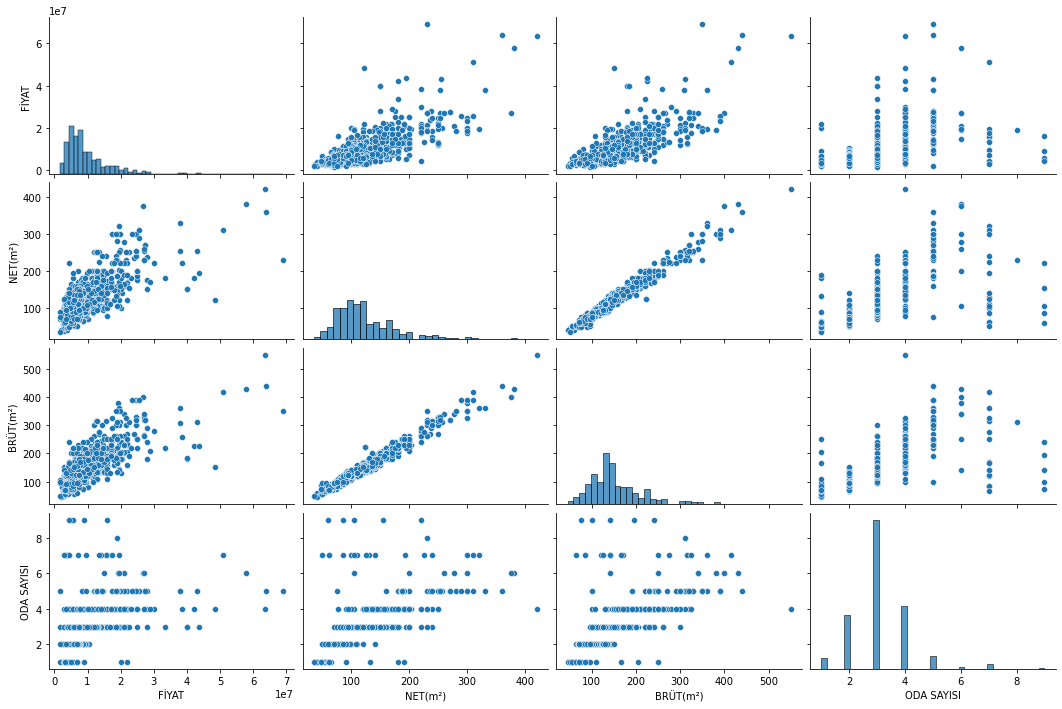

In [ ]:
sns.pairplot(df, aspect= 1.5)

<AxesSubplot:title={'center':'EV FİYATLARININ DAĞILIMI'}, xlabel='FİYAT', ylabel='Count'>

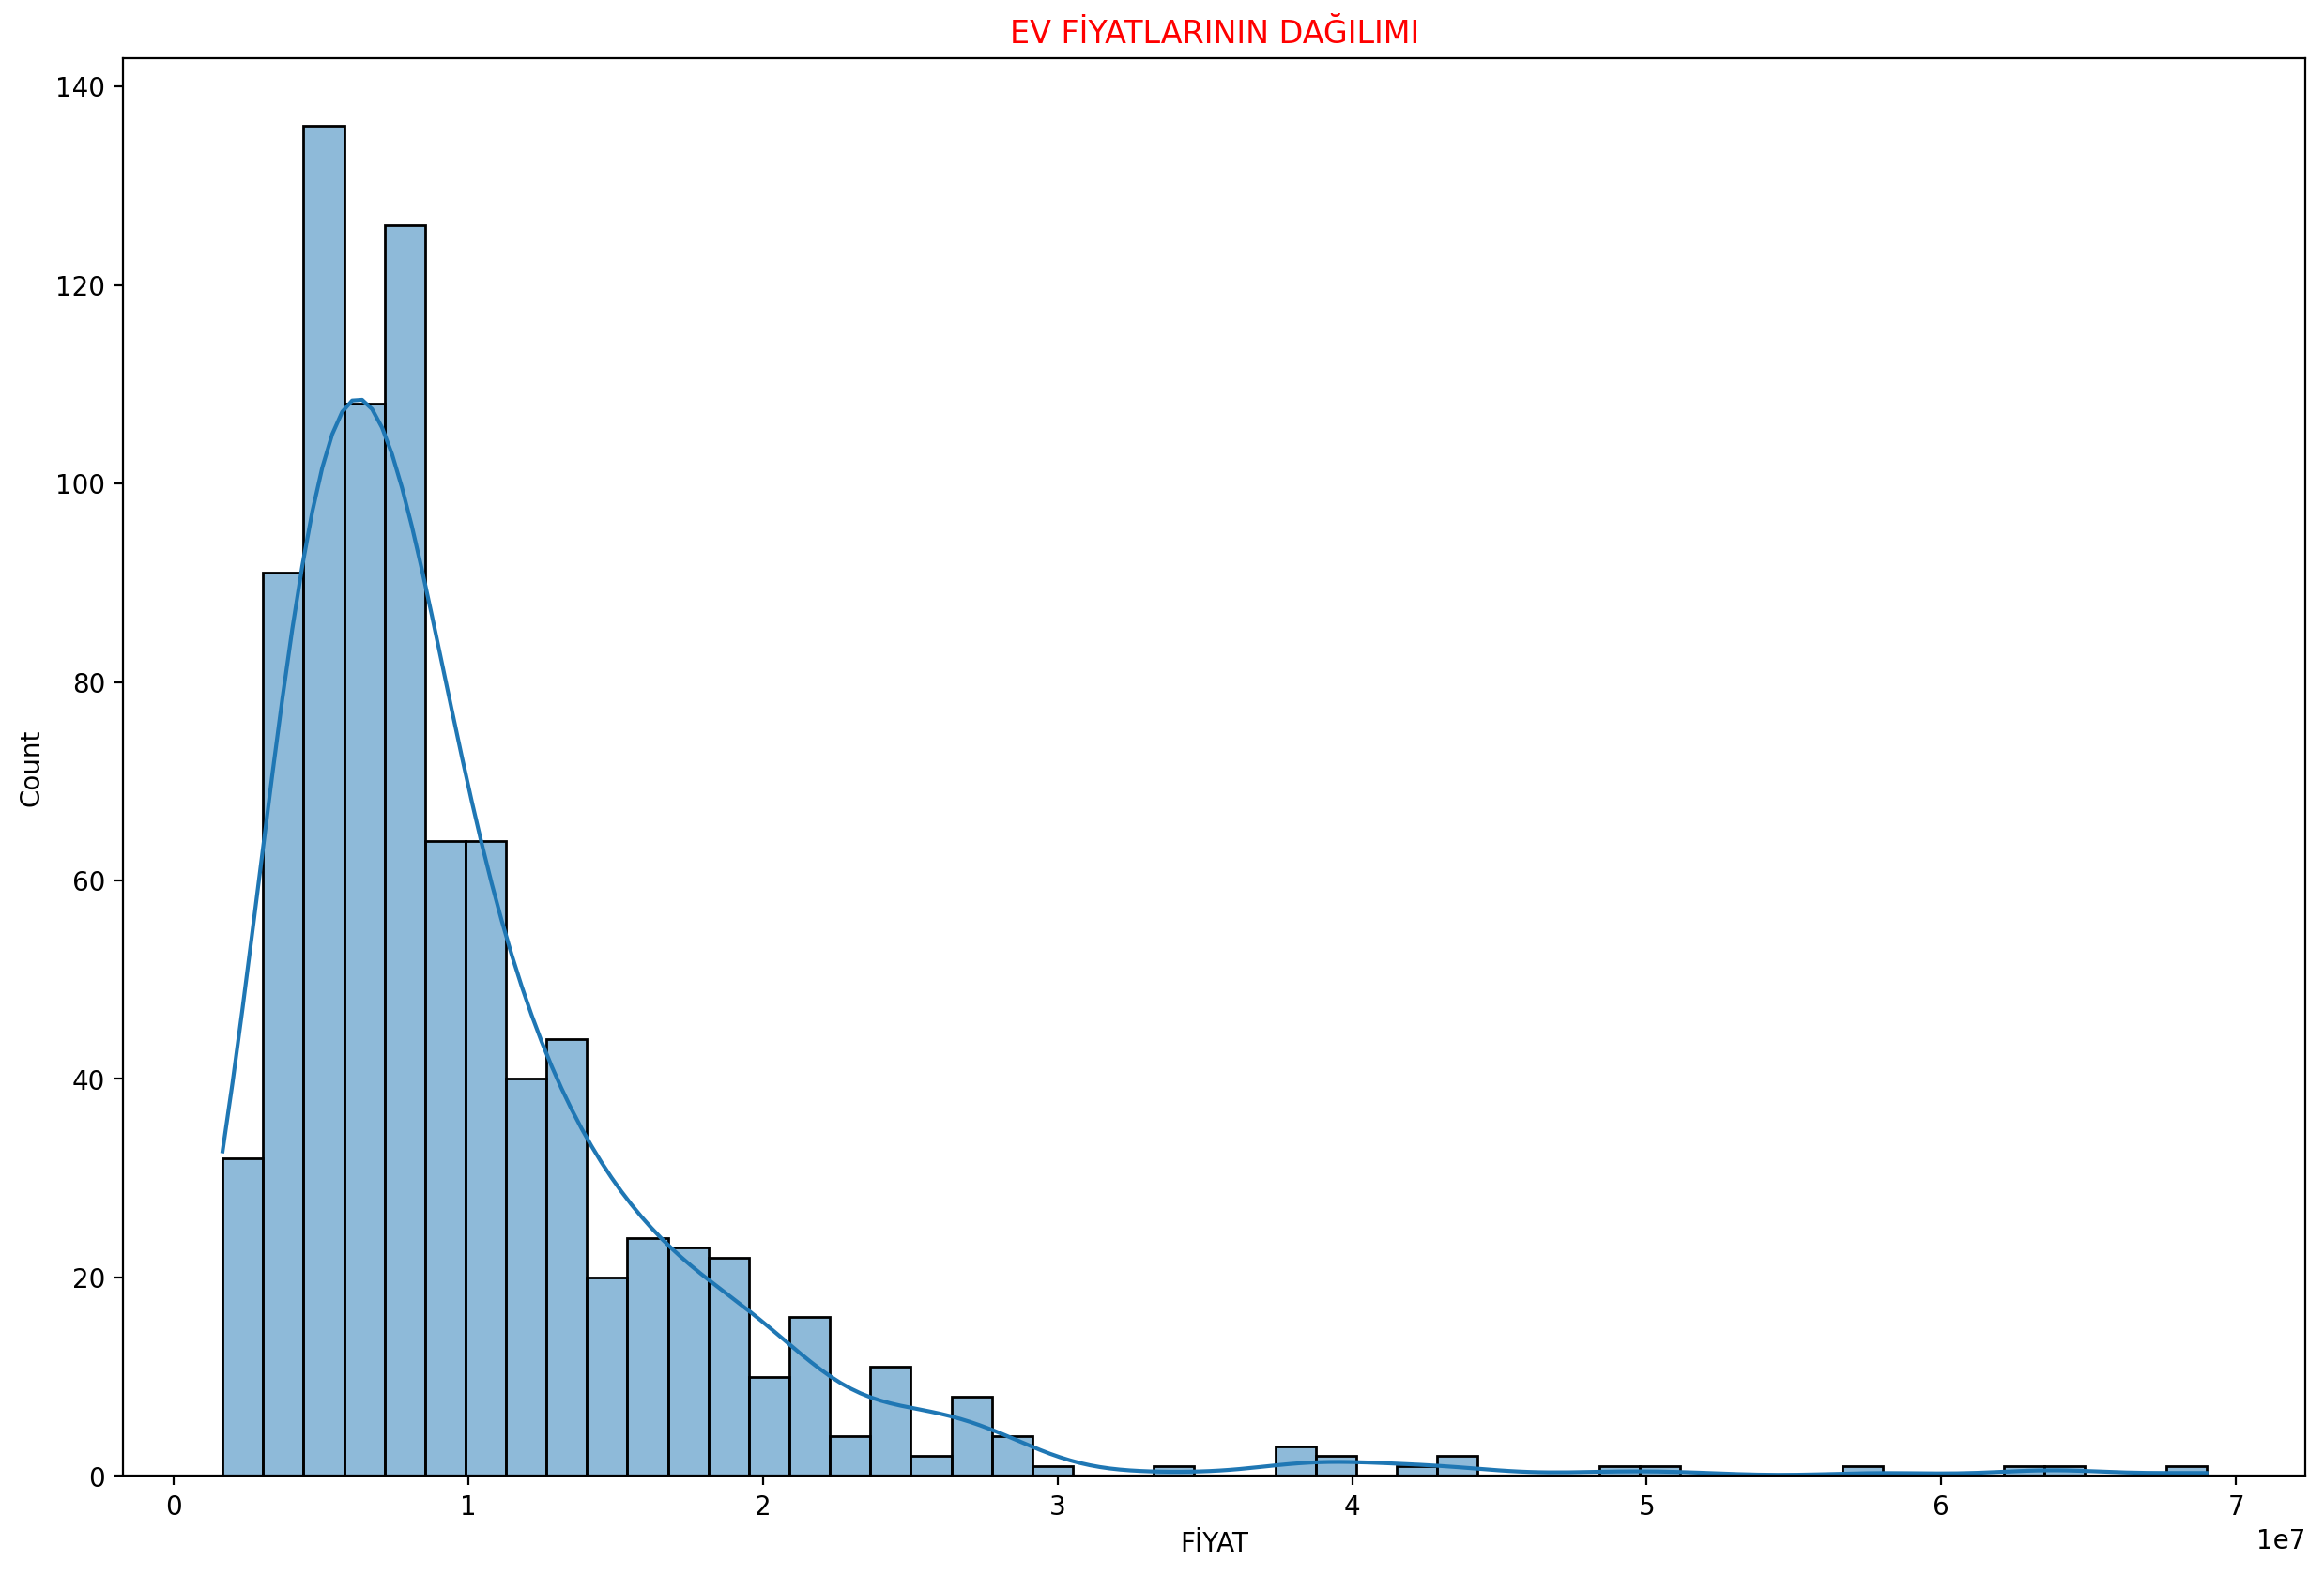

In [ ]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("EV FİYATLARININ DAĞILIMI", c="red")
sns.histplot(data=new_df, x="FİYAT", kde=True)
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project2/08_HousePriceDistributioninKadıköy.png', dpi=200)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
house_price_neighbourhood = df.groupby("MAHALLE").mean().sort_values("FİYAT", ascending = False).reset_index().iloc[:,:2]
house_price_neighbourhood

,MAHALLE,FİYAT
0,Caddebostan,1.762607e+07
1,Fenerbahçe,1.714425e+07
2,Suadiye,1.078684e+07
3,Erenköy,9.582000e+06
4,Göztepe,9.554008e+06
5,Feneryolu,8.400645e+06
6,Bostancı,8.183235e+06
7,Zühtüpaşa,7.489750e+06
8,Acıbadem,7.027292e+06
9,Kozyatağı,5.894756e+06


<AxesSubplot:title={'center':'ORTALAMA EV FİYATLARI EN YÜKSEK İLK 10 MAHALLE'}, xlabel='MAHALLE', ylabel='FİYAT'>

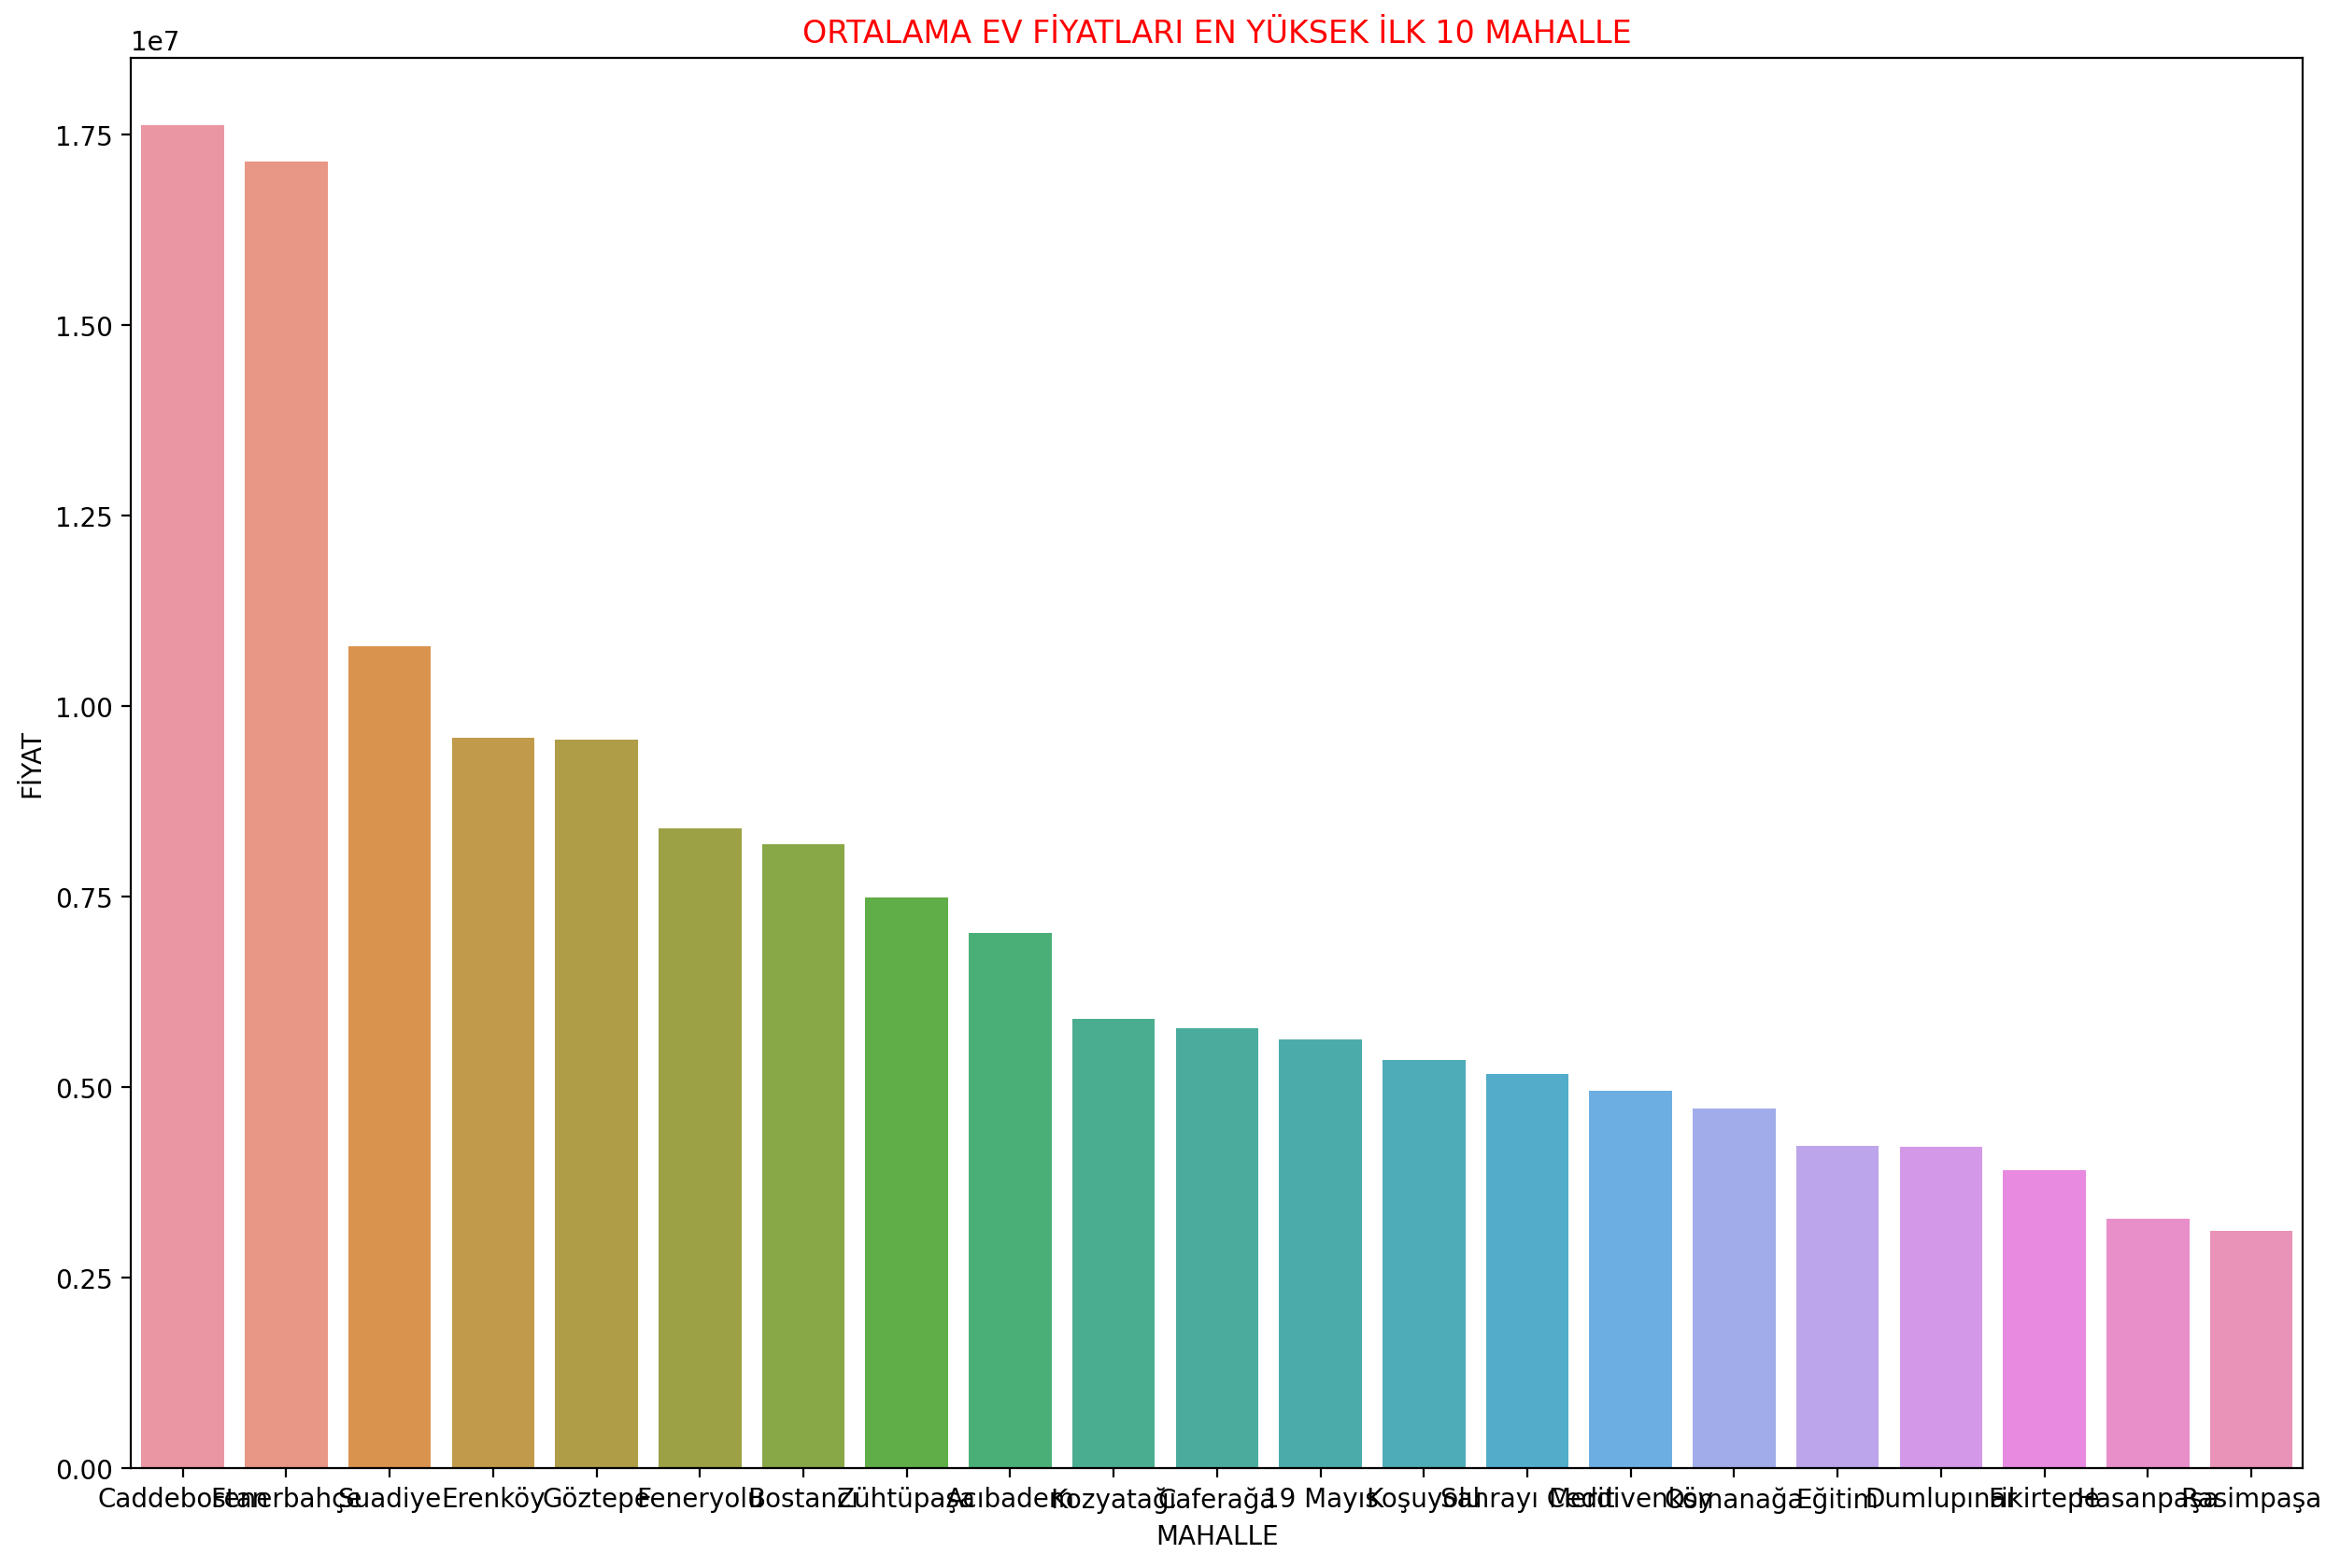

In [ ]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("ORTALAMA EV FİYATLARI EN YÜKSEK İLK 10 MAHALLE", c="red")
sns.barplot(x = 'MAHALLE', y = 'FİYAT', data = house_price_neighbourhood)

In [ ]:
oda_salon = df.groupby("ODA-SALON SAYISI").count().reset_index().iloc[:,:2]
oda_salon

,ODA-SALON SAYISI,İLAN ADI
0,1+0 (Stüdyo),3
1,1+1,27
2,10,3
3,2+1,154
4,2+2,2
5,3,3
6,3+1,413
7,3+2,12
8,4,9
9,4+1,152


Text(0, 0.5, 'İLAN SAYISI')

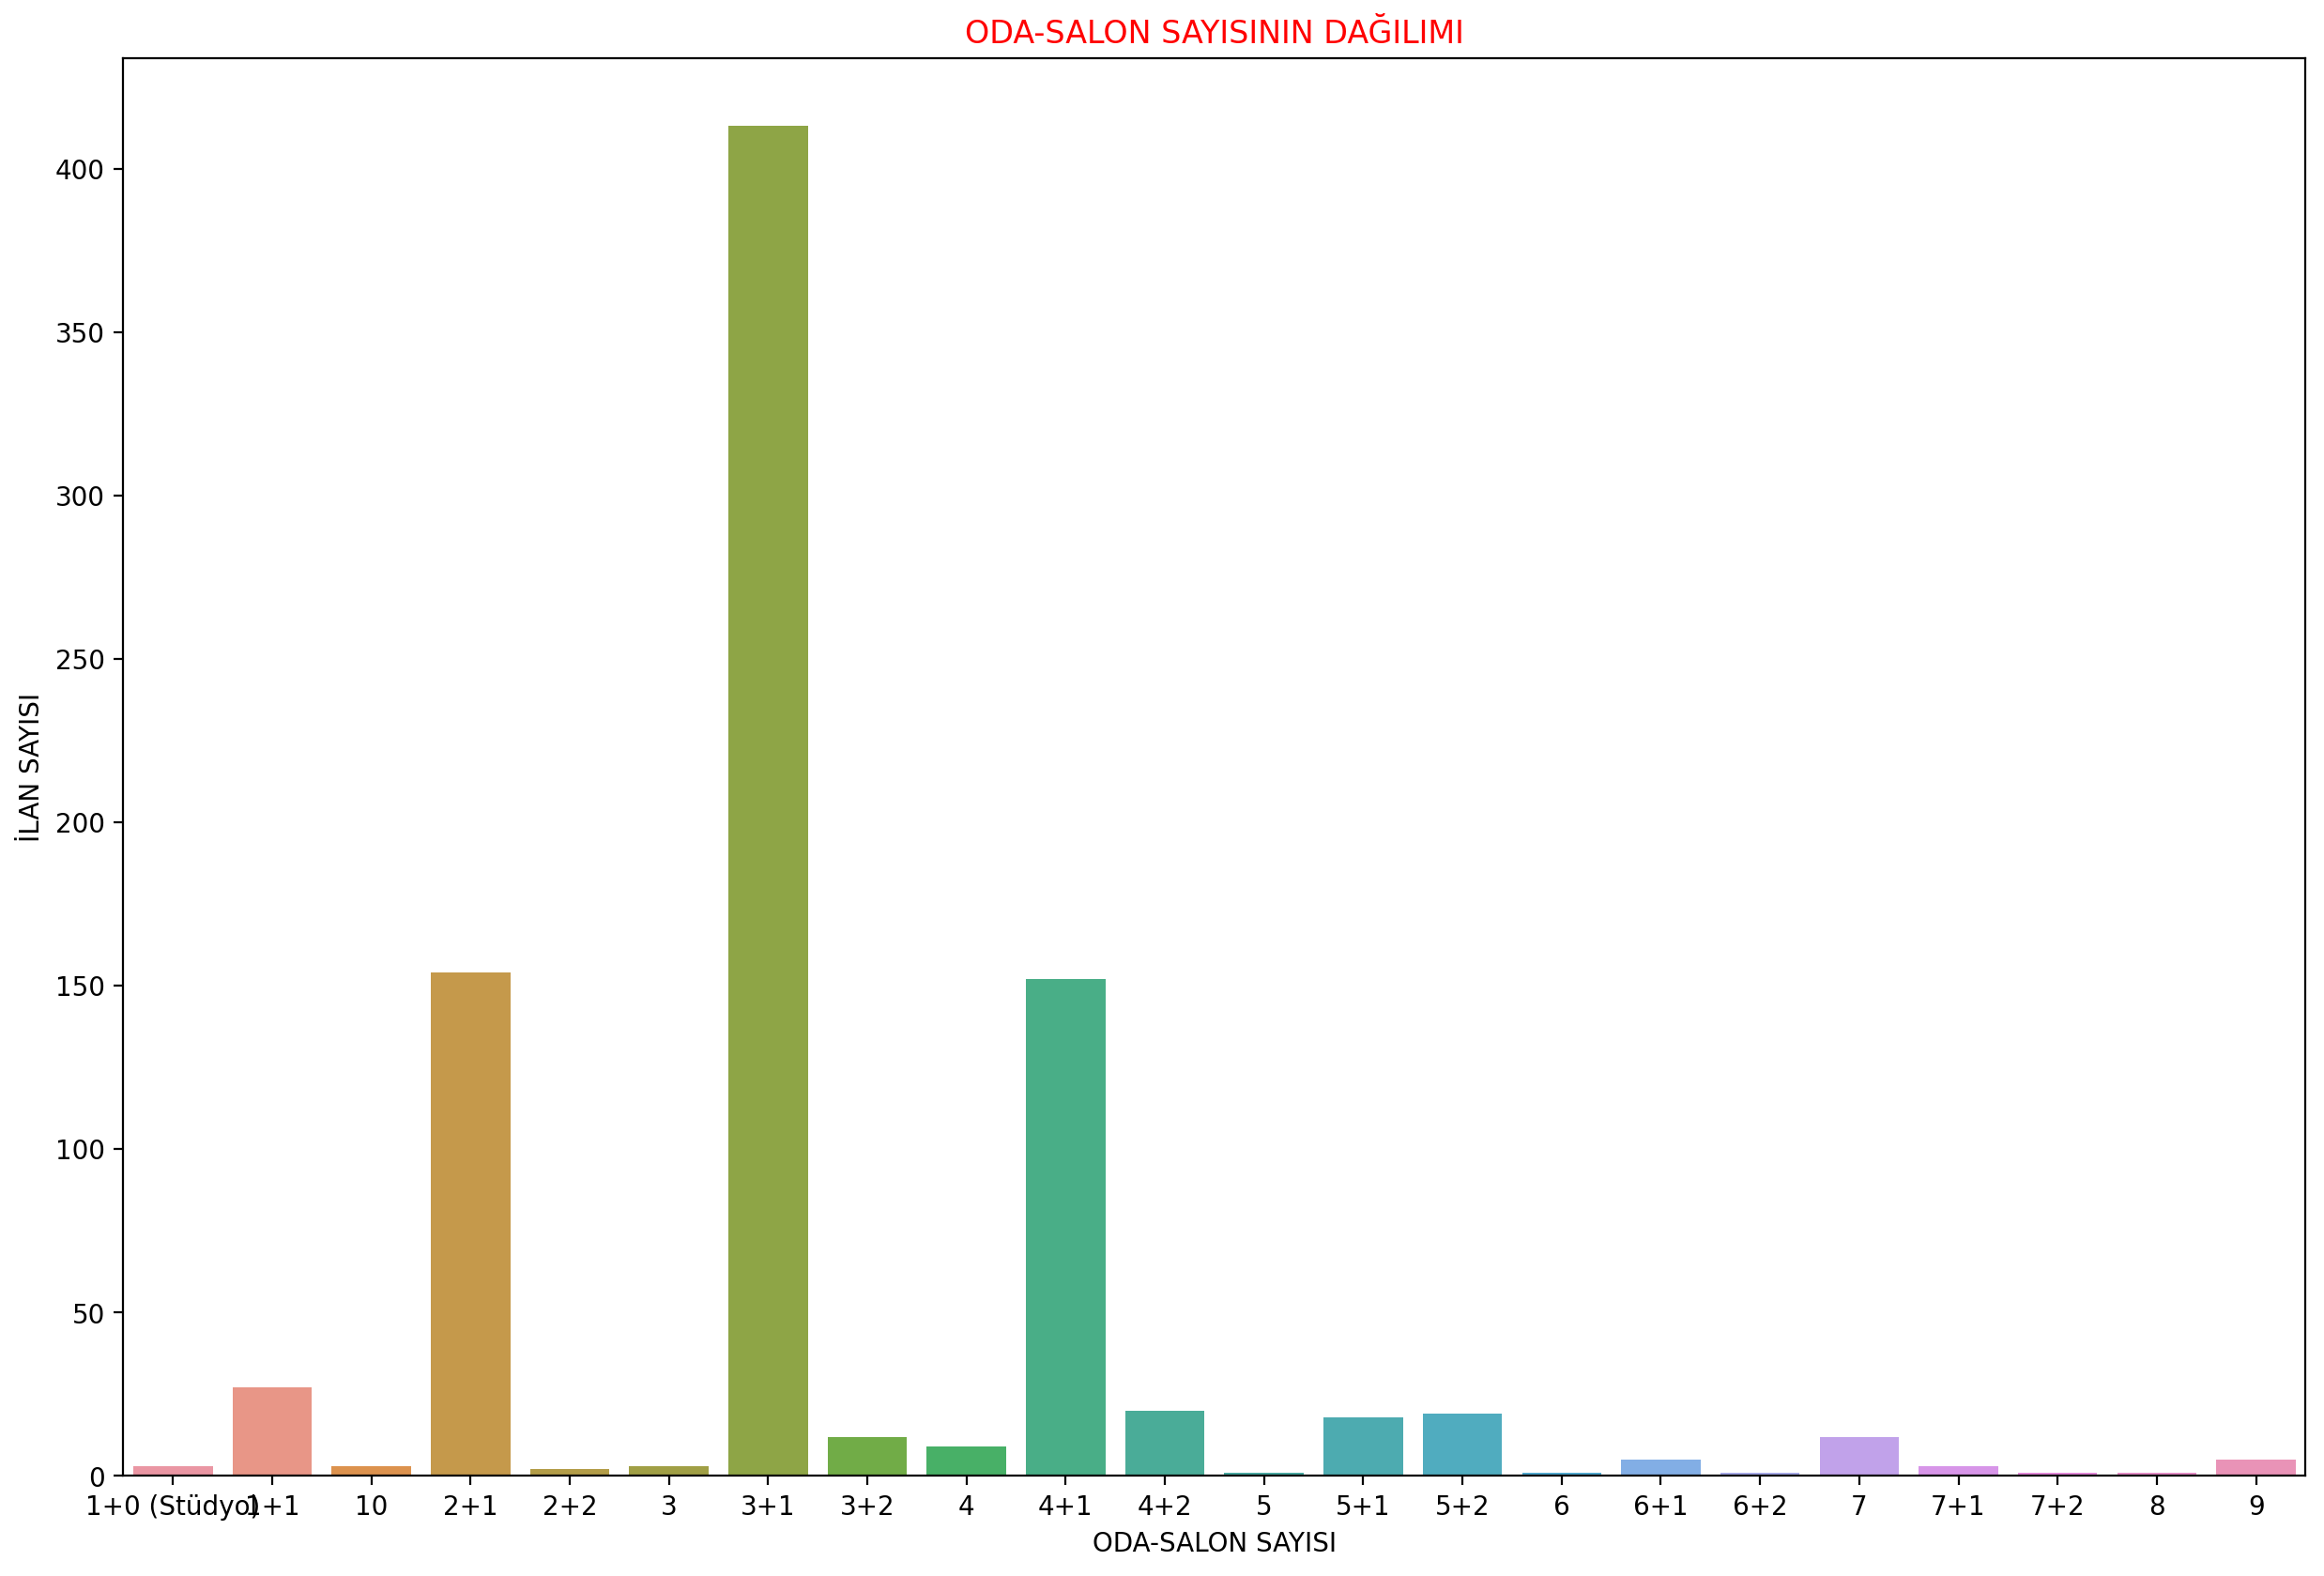

In [ ]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("ODA-SALON SAYISININ DAĞILIMI", c="red")
sns.barplot(x = 'ODA-SALON SAYISI', y = 'İLAN ADI', data = oda_salon)
plt.ylabel("İLAN SAYISI")
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project2/02_DistributionofNumberofRoom.png', dpi=200)

In [ ]:
banyo = df.groupby("BANYO SAYISI").count().iloc[:,0:1].reset_index()
banyo

,BANYO SAYISI,İLAN ADI
0,1,266
1,2,448
2,3,89
3,4,27
4,UNKNOWN,35


Text(0, 0.5, 'İLAN SAYISI')

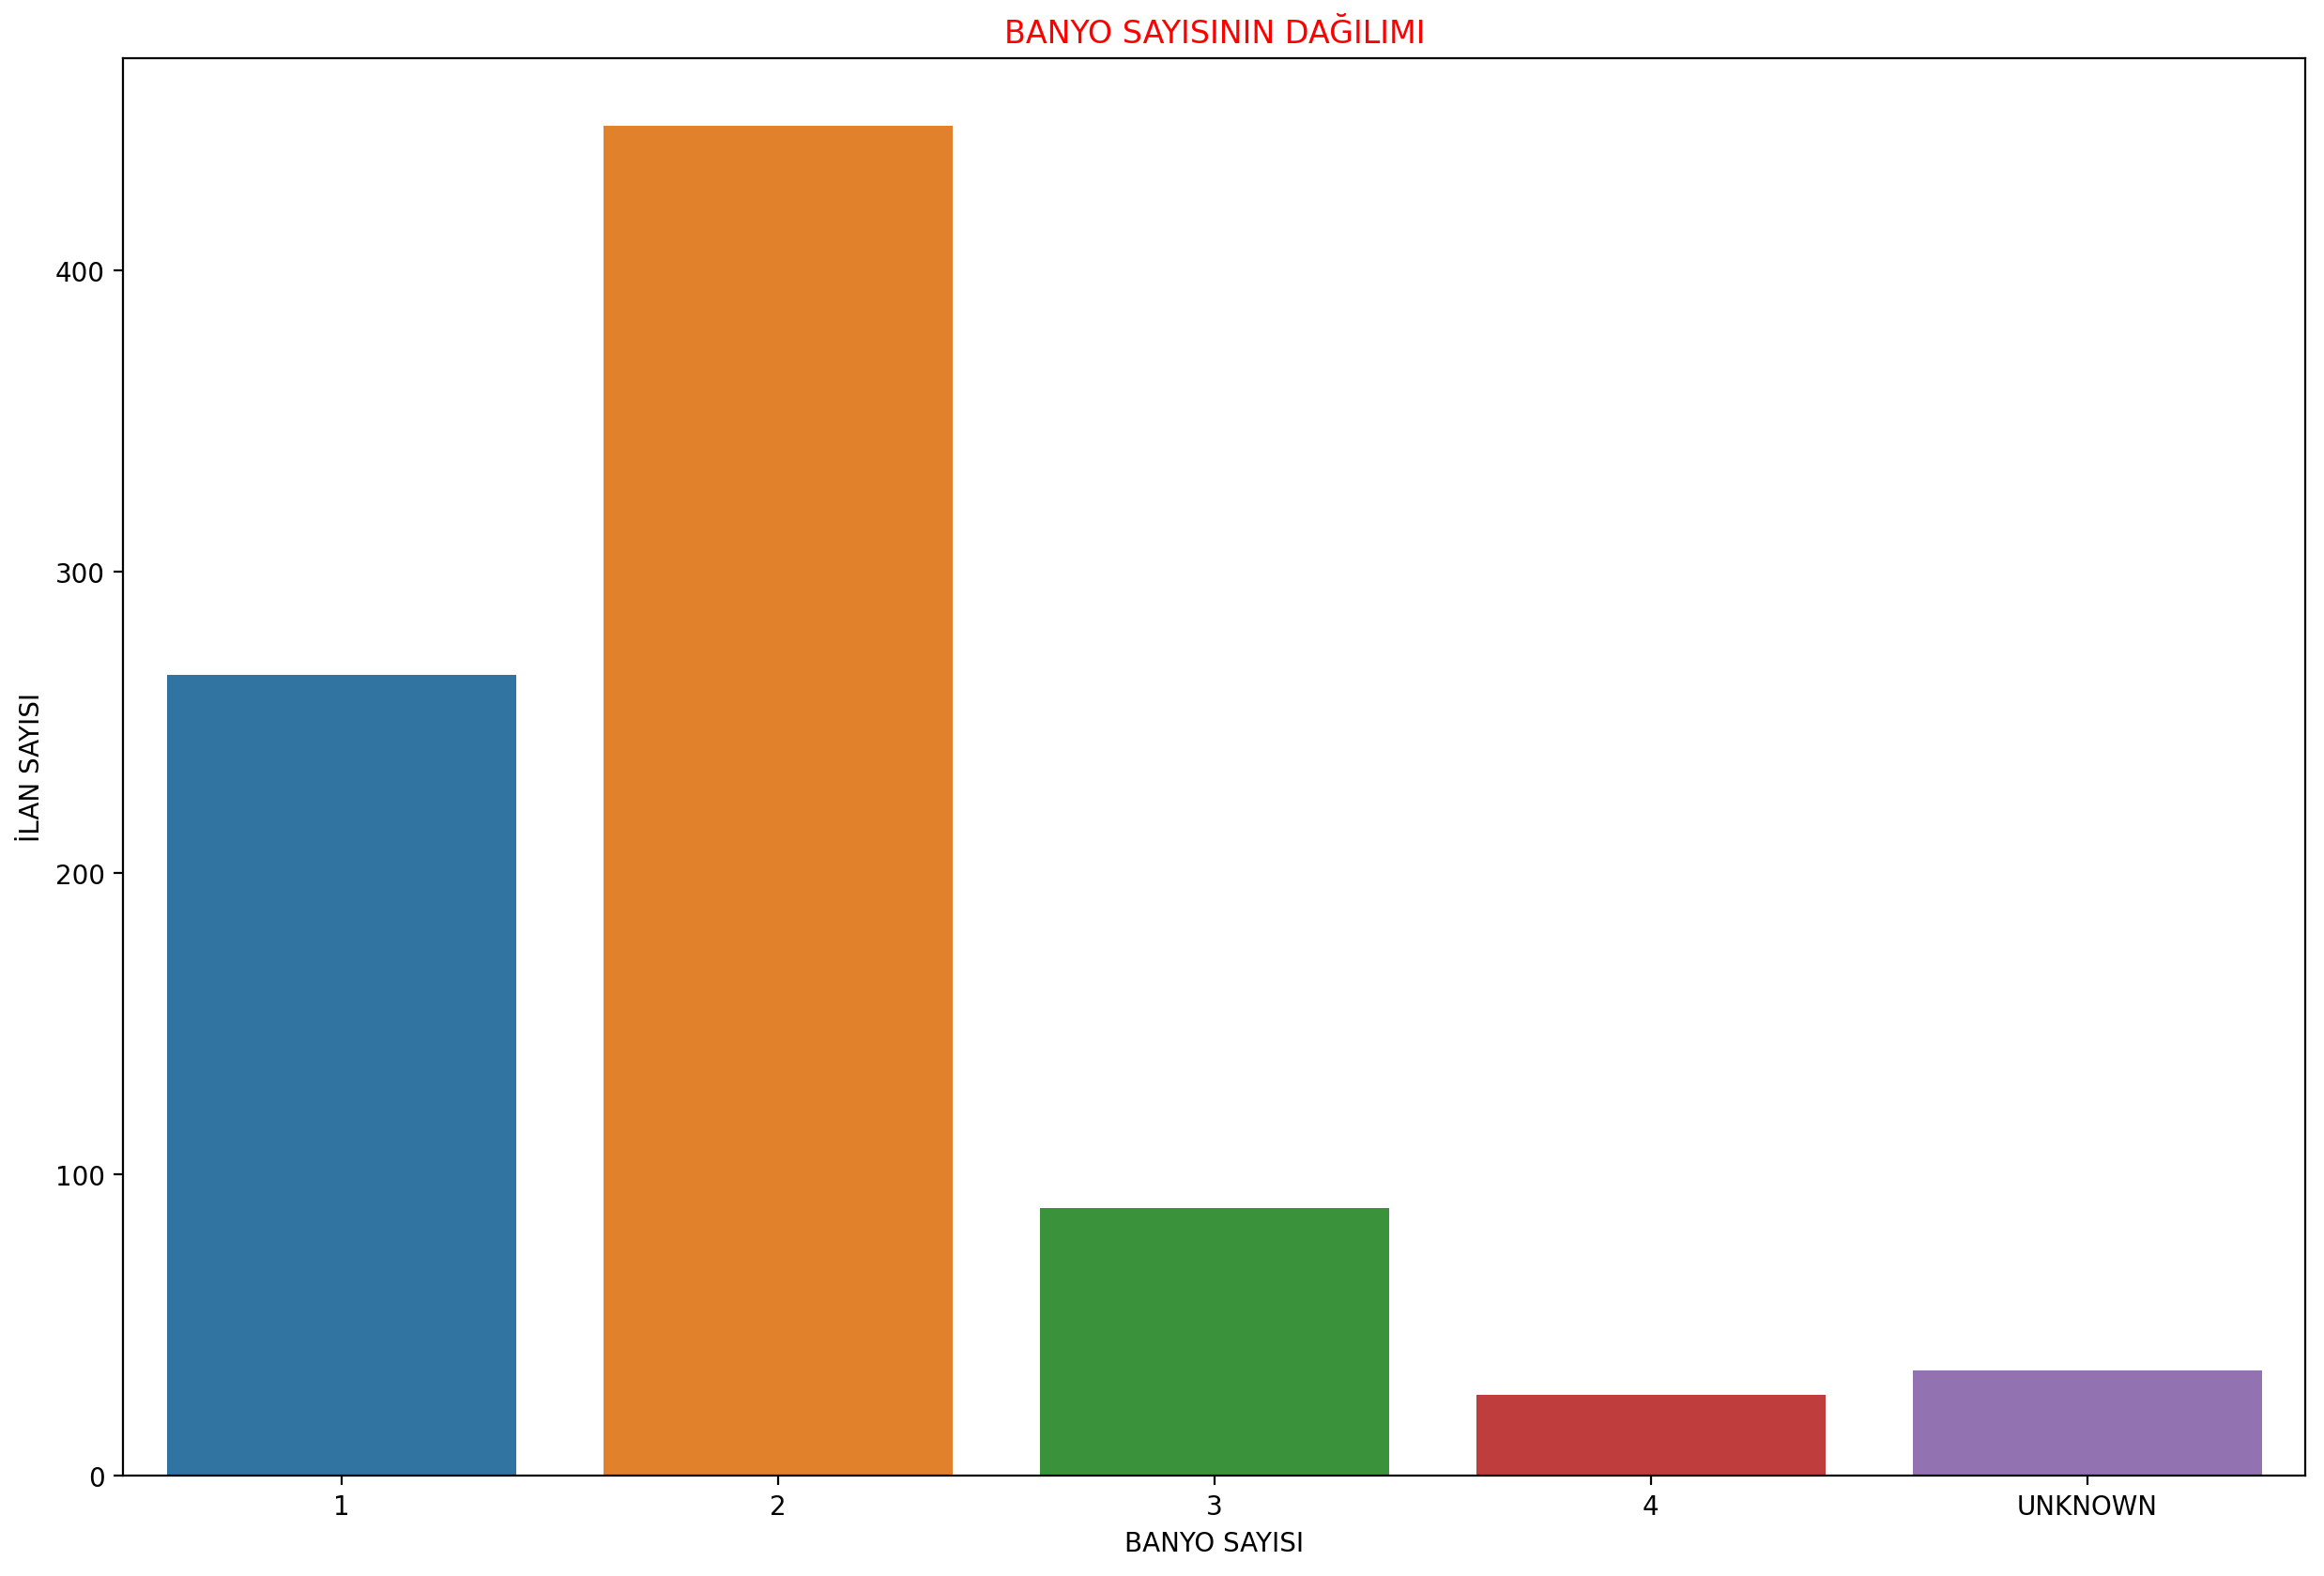

In [ ]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("BANYO SAYISININ DAĞILIMI", c="red")
sns.barplot(x = 'BANYO SAYISI', y = 'İLAN ADI', data = banyo)
plt.ylabel("İLAN SAYISI")


In [ ]:
mahalle = df.groupby("MAHALLE").count().iloc[:,0:1].reset_index().head(10)
mahalle_sort = mahalle.sort_values("İLAN ADI", ascending=False)
mahalle_sort

,MAHALLE,İLAN ADI
6,Erenköy,95
8,Fenerbahçe,87
3,Caddebostan,84
2,Bostancı,68
9,Feneryolu,62
1,Acıbadem,24
4,Caferağa,18
0,19 Mayıs,16
7,Eğitim,14
5,Dumlupınar,12


Text(0, 0.5, 'İLAN SAYISI')

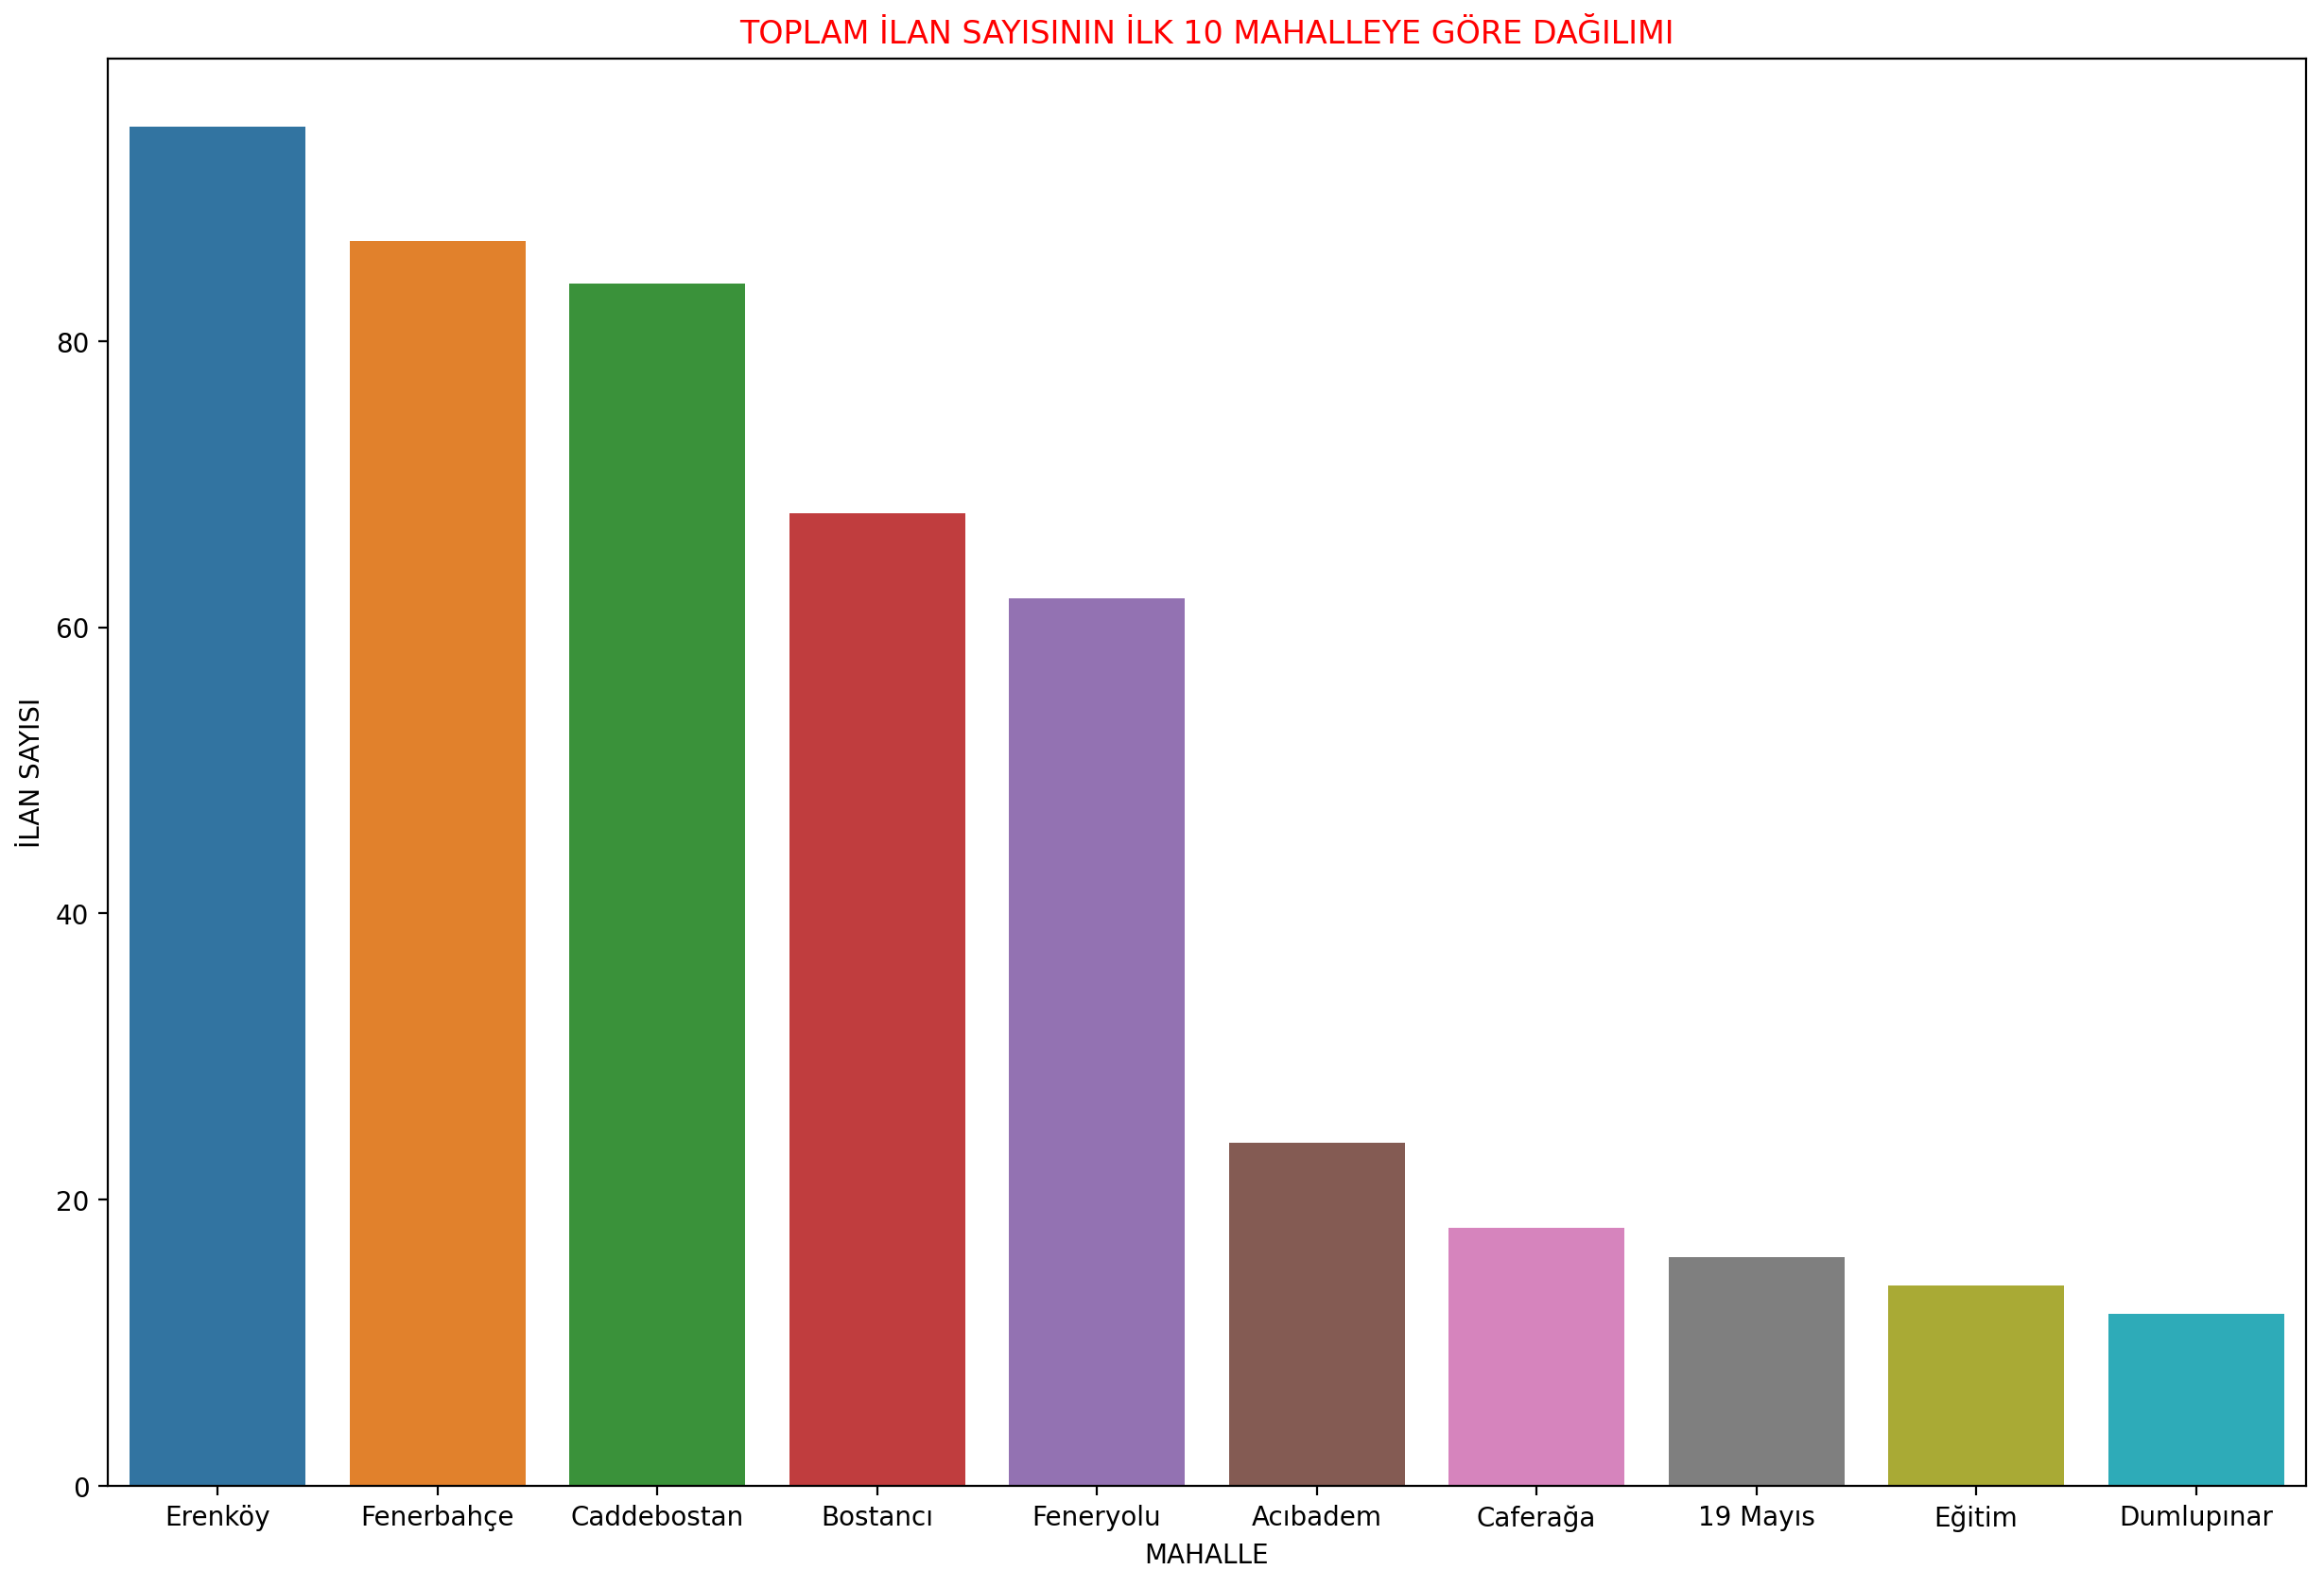

In [ ]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("TOPLAM İLAN SAYISININ İLK 10 MAHALLEYE GÖRE DAĞILIMI", c="red")
sns.barplot(x = 'MAHALLE', y = 'İLAN ADI', data = mahalle_sort)
plt.ylabel("İLAN SAYISI")


In [ ]:
new_df.corr()

,FİYAT,NET(m²),BRÜT(m²),ODA SAYISI,MAHALLE_19 Mayıs,MAHALLE_Acıbadem,MAHALLE_Bostancı,MAHALLE_Caddebostan,MAHALLE_Caferağa,MAHALLE_Dumlupınar,...,MAHALLE_Göztepe,MAHALLE_Hasanpaşa,MAHALLE_Kozyatağı,MAHALLE_Koşuyolu,MAHALLE_Merdivenköy,MAHALLE_Osmanağa,MAHALLE_Rasimpaşa,MAHALLE_Sahrayı Cedit,MAHALLE_Suadiye,MAHALLE_Zühtüpaşa
FİYAT,1.000000,0.735431,0.755959,0.448213,-0.079139,-0.066068,-0.069453,0.332776,-0.081174,-0.090604,...,-0.022567,-0.105562,-0.120747,-0.029537,-0.114962,-0.079078,-0.082222,-0.100465,0.042540,-0.050732
NET(m²),0.735431,1.000000,0.982547,0.651884,-0.061938,-0.004703,-0.054200,0.245345,-0.059496,-0.120462,...,0.006349,-0.084718,-0.084532,-0.037609,-0.090148,-0.059250,-0.067108,-0.062293,0.006978,-0.036148
BRÜT(m²),0.755959,0.982547,1.000000,0.653615,-0.070852,-0.025096,-0.061721,0.262133,-0.076605,-0.111869,...,0.011274,-0.096045,-0.088044,-0.043264,-0.097256,-0.078110,-0.079656,-0.064831,0.011808,-0.037082
ODA SAYISI,0.448213,0.651884,0.653615,1.000000,-0.051843,-0.020442,-0.004479,0.188766,-0.051490,-0.157854,...,-0.013731,-0.088278,-0.059107,-0.049950,-0.051489,-0.081444,-0.059657,0.008176,-0.011794,-0.051331
MAHALLE_19 Mayıs,-0.079139,-0.061938,-0.070852,-0.051843,1.000000,-0.023191,-0.040099,-0.045022,-0.020012,-0.016283,...,-0.055362,-0.016283,-0.030622,-0.006609,-0.023683,-0.015580,-0.012400,-0.021654,-0.054294,-0.021120
MAHALLE_Acıbadem,-0.066068,-0.004703,-0.025096,-0.020442,-0.023191,1.000000,-0.049344,-0.055402,-0.024626,-0.020037,...,-0.068126,-0.020037,-0.037682,-0.008132,-0.029143,-0.019172,-0.015259,-0.026647,-0.066811,-0.025989
MAHALLE_Bostancı,-0.069453,-0.054200,-0.061721,-0.004479,-0.040099,-0.049344,1.000000,-0.095794,-0.042581,-0.034645,...,-0.117796,-0.034645,-0.065156,-0.014062,-0.050391,-0.033151,-0.026383,-0.046075,-0.115523,-0.044938
MAHALLE_Caddebostan,0.332776,0.245345,0.262133,0.188766,-0.045022,-0.055402,-0.095794,1.000000,-0.047809,-0.038898,...,-0.132258,-0.038898,-0.073155,-0.015788,-0.056578,-0.037220,-0.029622,-0.051731,-0.129705,-0.050455
MAHALLE_Caferağa,-0.081174,-0.059496,-0.076605,-0.051490,-0.020012,-0.024626,-0.042581,-0.047809,1.000000,-0.017291,...,-0.058790,-0.017291,-0.032518,-0.007018,-0.025149,-0.016545,-0.013167,-0.022995,-0.057655,-0.022428
MAHALLE_Dumlupınar,-0.090604,-0.120462,-0.111869,-0.157854,-0.016283,-0.020037,-0.034645,-0.038898,-0.017291,1.000000,...,-0.047832,-0.014068,-0.026457,-0.005710,-0.020462,-0.013461,-0.010713,-0.018709,-0.046909,-0.018247


<AxesSubplot:title={'center':'EV ÖZELLİKLERİNE AİT KORELASYON MATRİSİ'}>

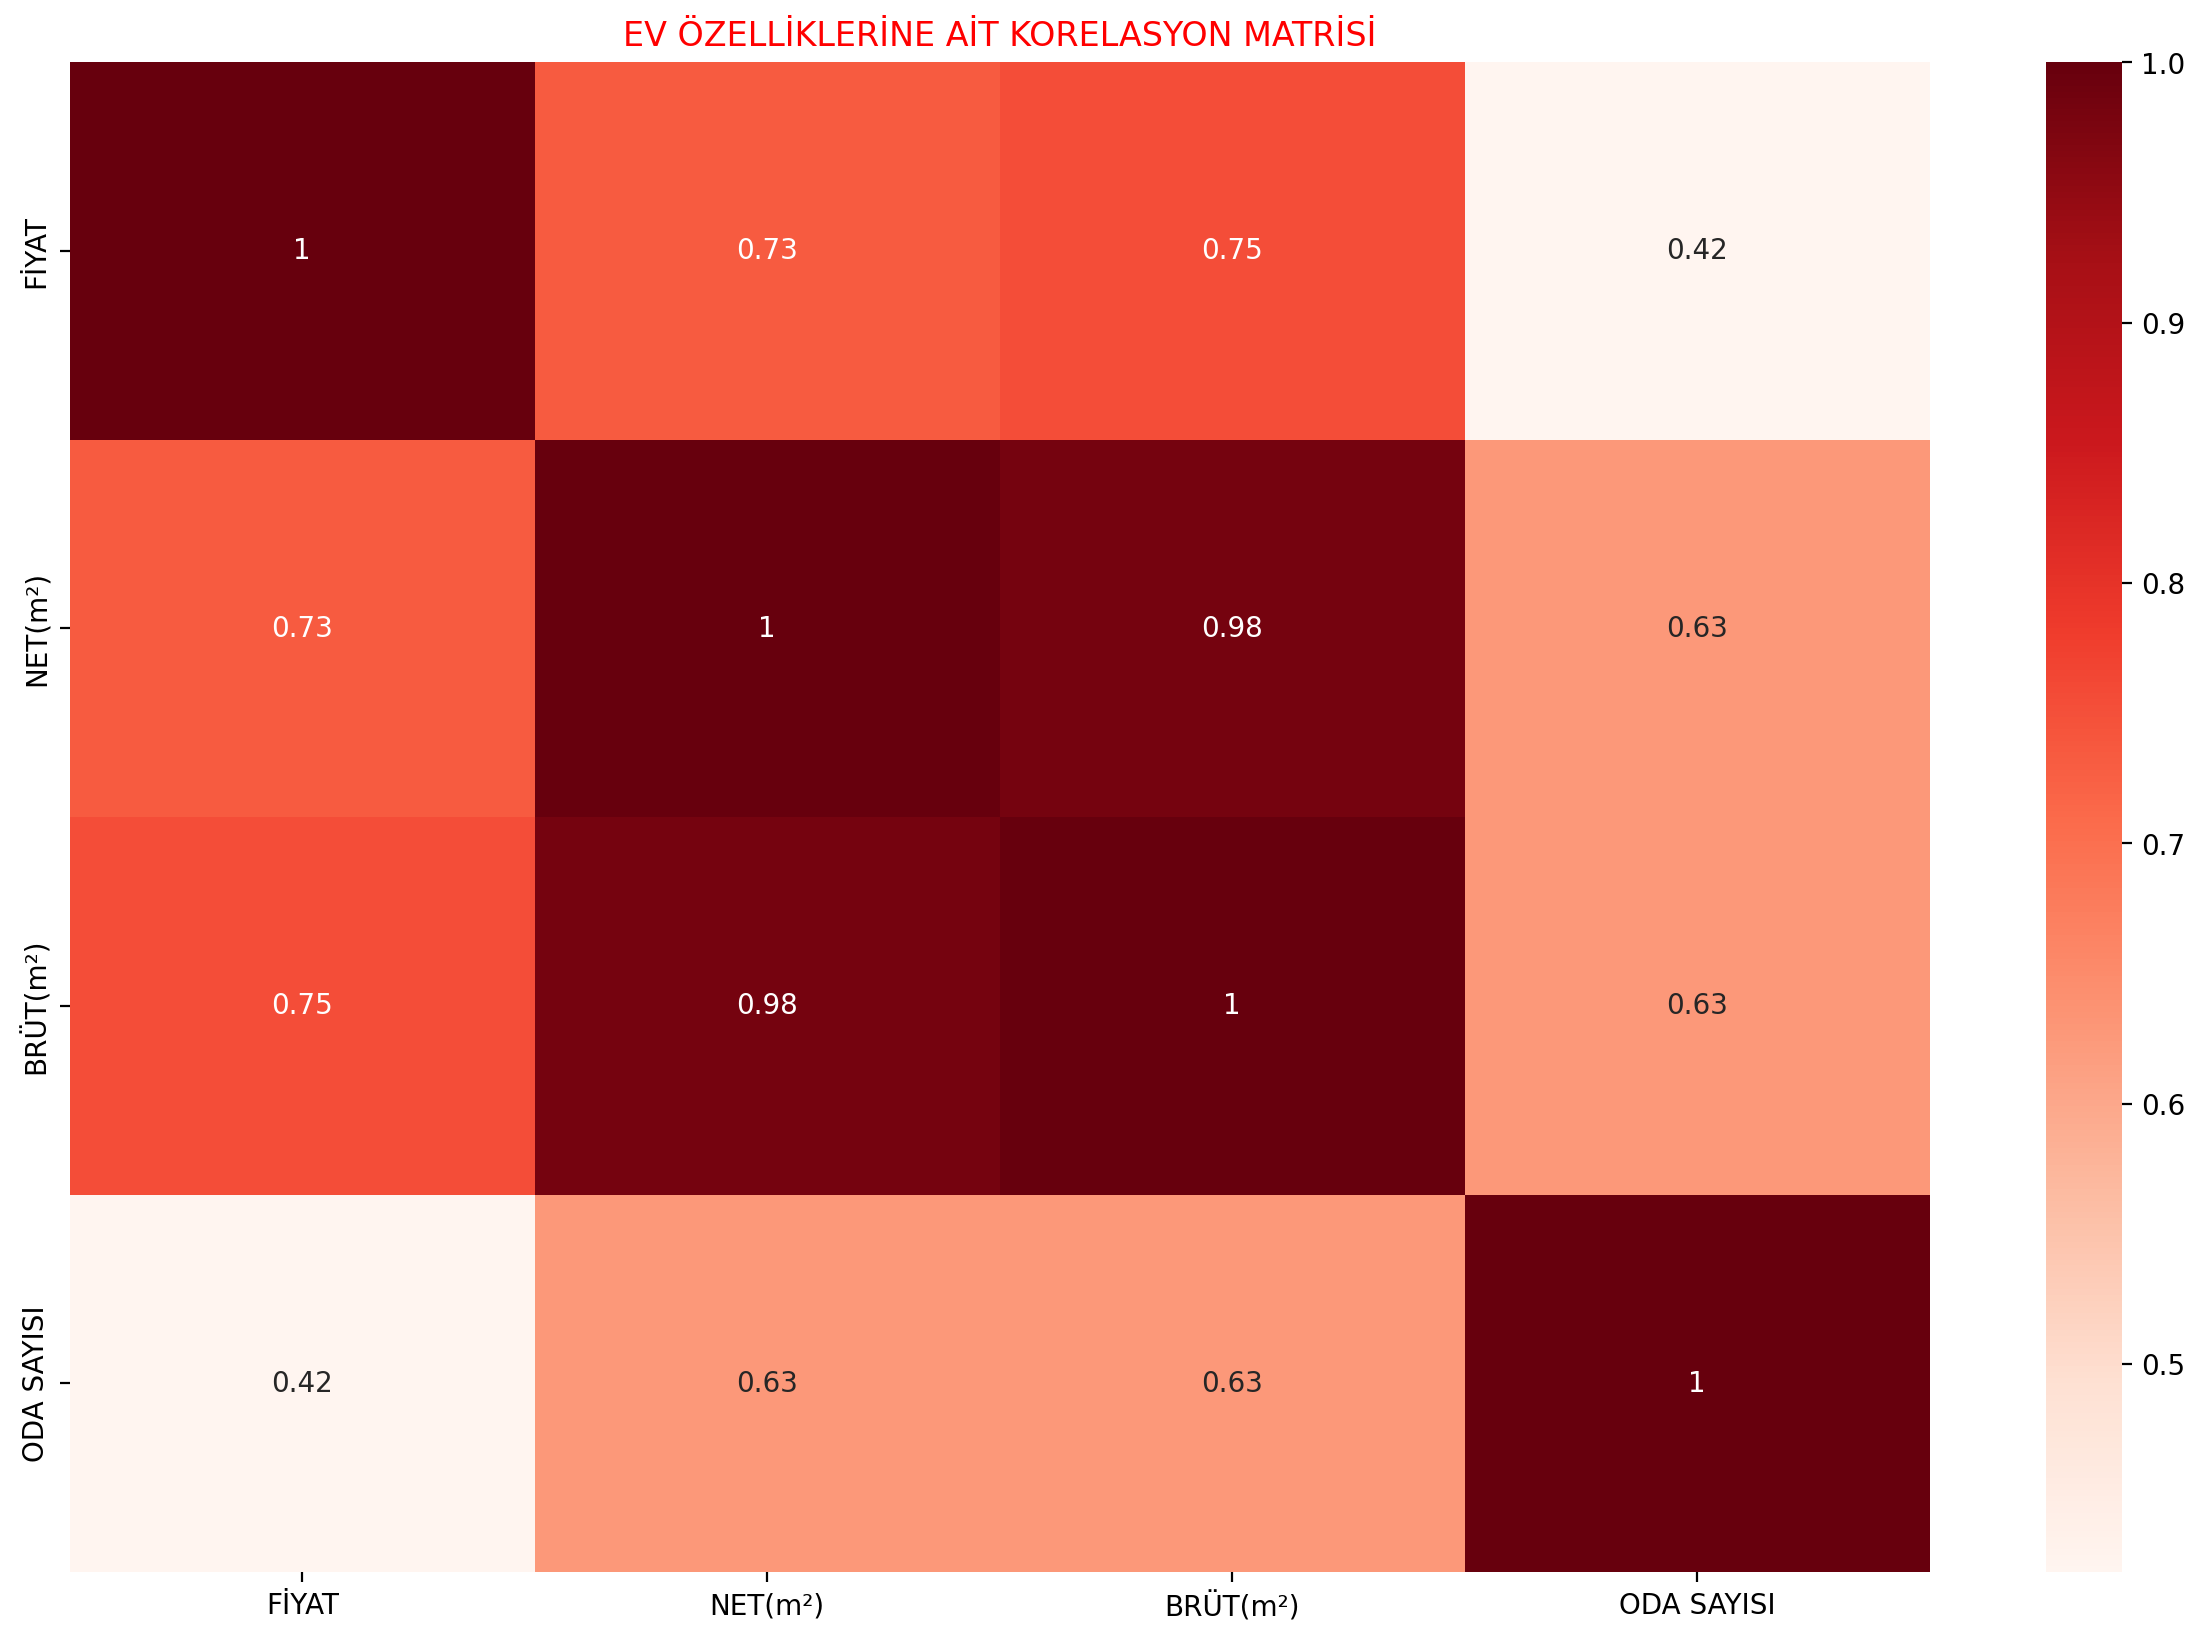

In [ ]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("EV ÖZELLİKLERİNE AİT KORELASYON MATRİSİ", c="red")
sns.heatmap(DF.corr(), cmap="Reds", annot=True)


In [ ]:
other_df = new_df.drop(columns=["NET(m²)","BRÜT(m²)","ODA SAYISI","SALON SAYISI","BANYO SAYISI","FOTOĞRAF SAYISI"])
other_df

,İLAN ADI,FİYAT,MAHALLE_19 Mayıs,MAHALLE_Acıbadem,MAHALLE_Bostancı,MAHALLE_Caddebostan,MAHALLE_Caferağa,MAHALLE_Dumlupınar,MAHALLE_Erenköy,MAHALLE_Eğitim,...,MAHALLE_Göztepe,MAHALLE_Hasanpaşa,MAHALLE_Kozyatağı,MAHALLE_Koşuyolu,MAHALLE_Merdivenköy,MAHALLE_Osmanağa,MAHALLE_Rasimpaşa,MAHALLE_Sahrayı Cedit,MAHALLE_Suadiye,MAHALLE_Zühtüpaşa
0,GÖZTEPE TEPEGÖZ SOKAK NURAL KÖŞKÜ K.SİTESİ'NDE...,14000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Ethem Efendi Caddesi'nde Net 80 m2 Sıfır 2+1 B...,7300000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,"ZÜHTÜPAŞA BAĞDAT CAD'NE YAKIN, BOŞ, BALKONLU 3...",5450000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,KADIKÖY FİKİRTEPE TEKNİK YAPI CONCORD FULL EŞY...,3000000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SUADİYE BAĞDATA YAKIN 5 YILLIK YENİ 95M2 BALKO...,7200000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,Fenerbahçe'de 2 Balkonlu 2 Banyolu 4+1 AraKat ...,16950000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
878,Göztepe Marmaraya 450m. Ön Köşe Cephe Balkonlu...,5950000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
879,"Çiftehavuzlar Sahilde E.Banyolu Balkonlu 4+1, ...",16950000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
880,Feneryolu Marmaraya 350m. Katta Tek E.Banyolu ...,7650000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:title={'center':'EVİN BULUNDUĞU MAHALLEYE AİT KORELASYON MATRİSİ'}>

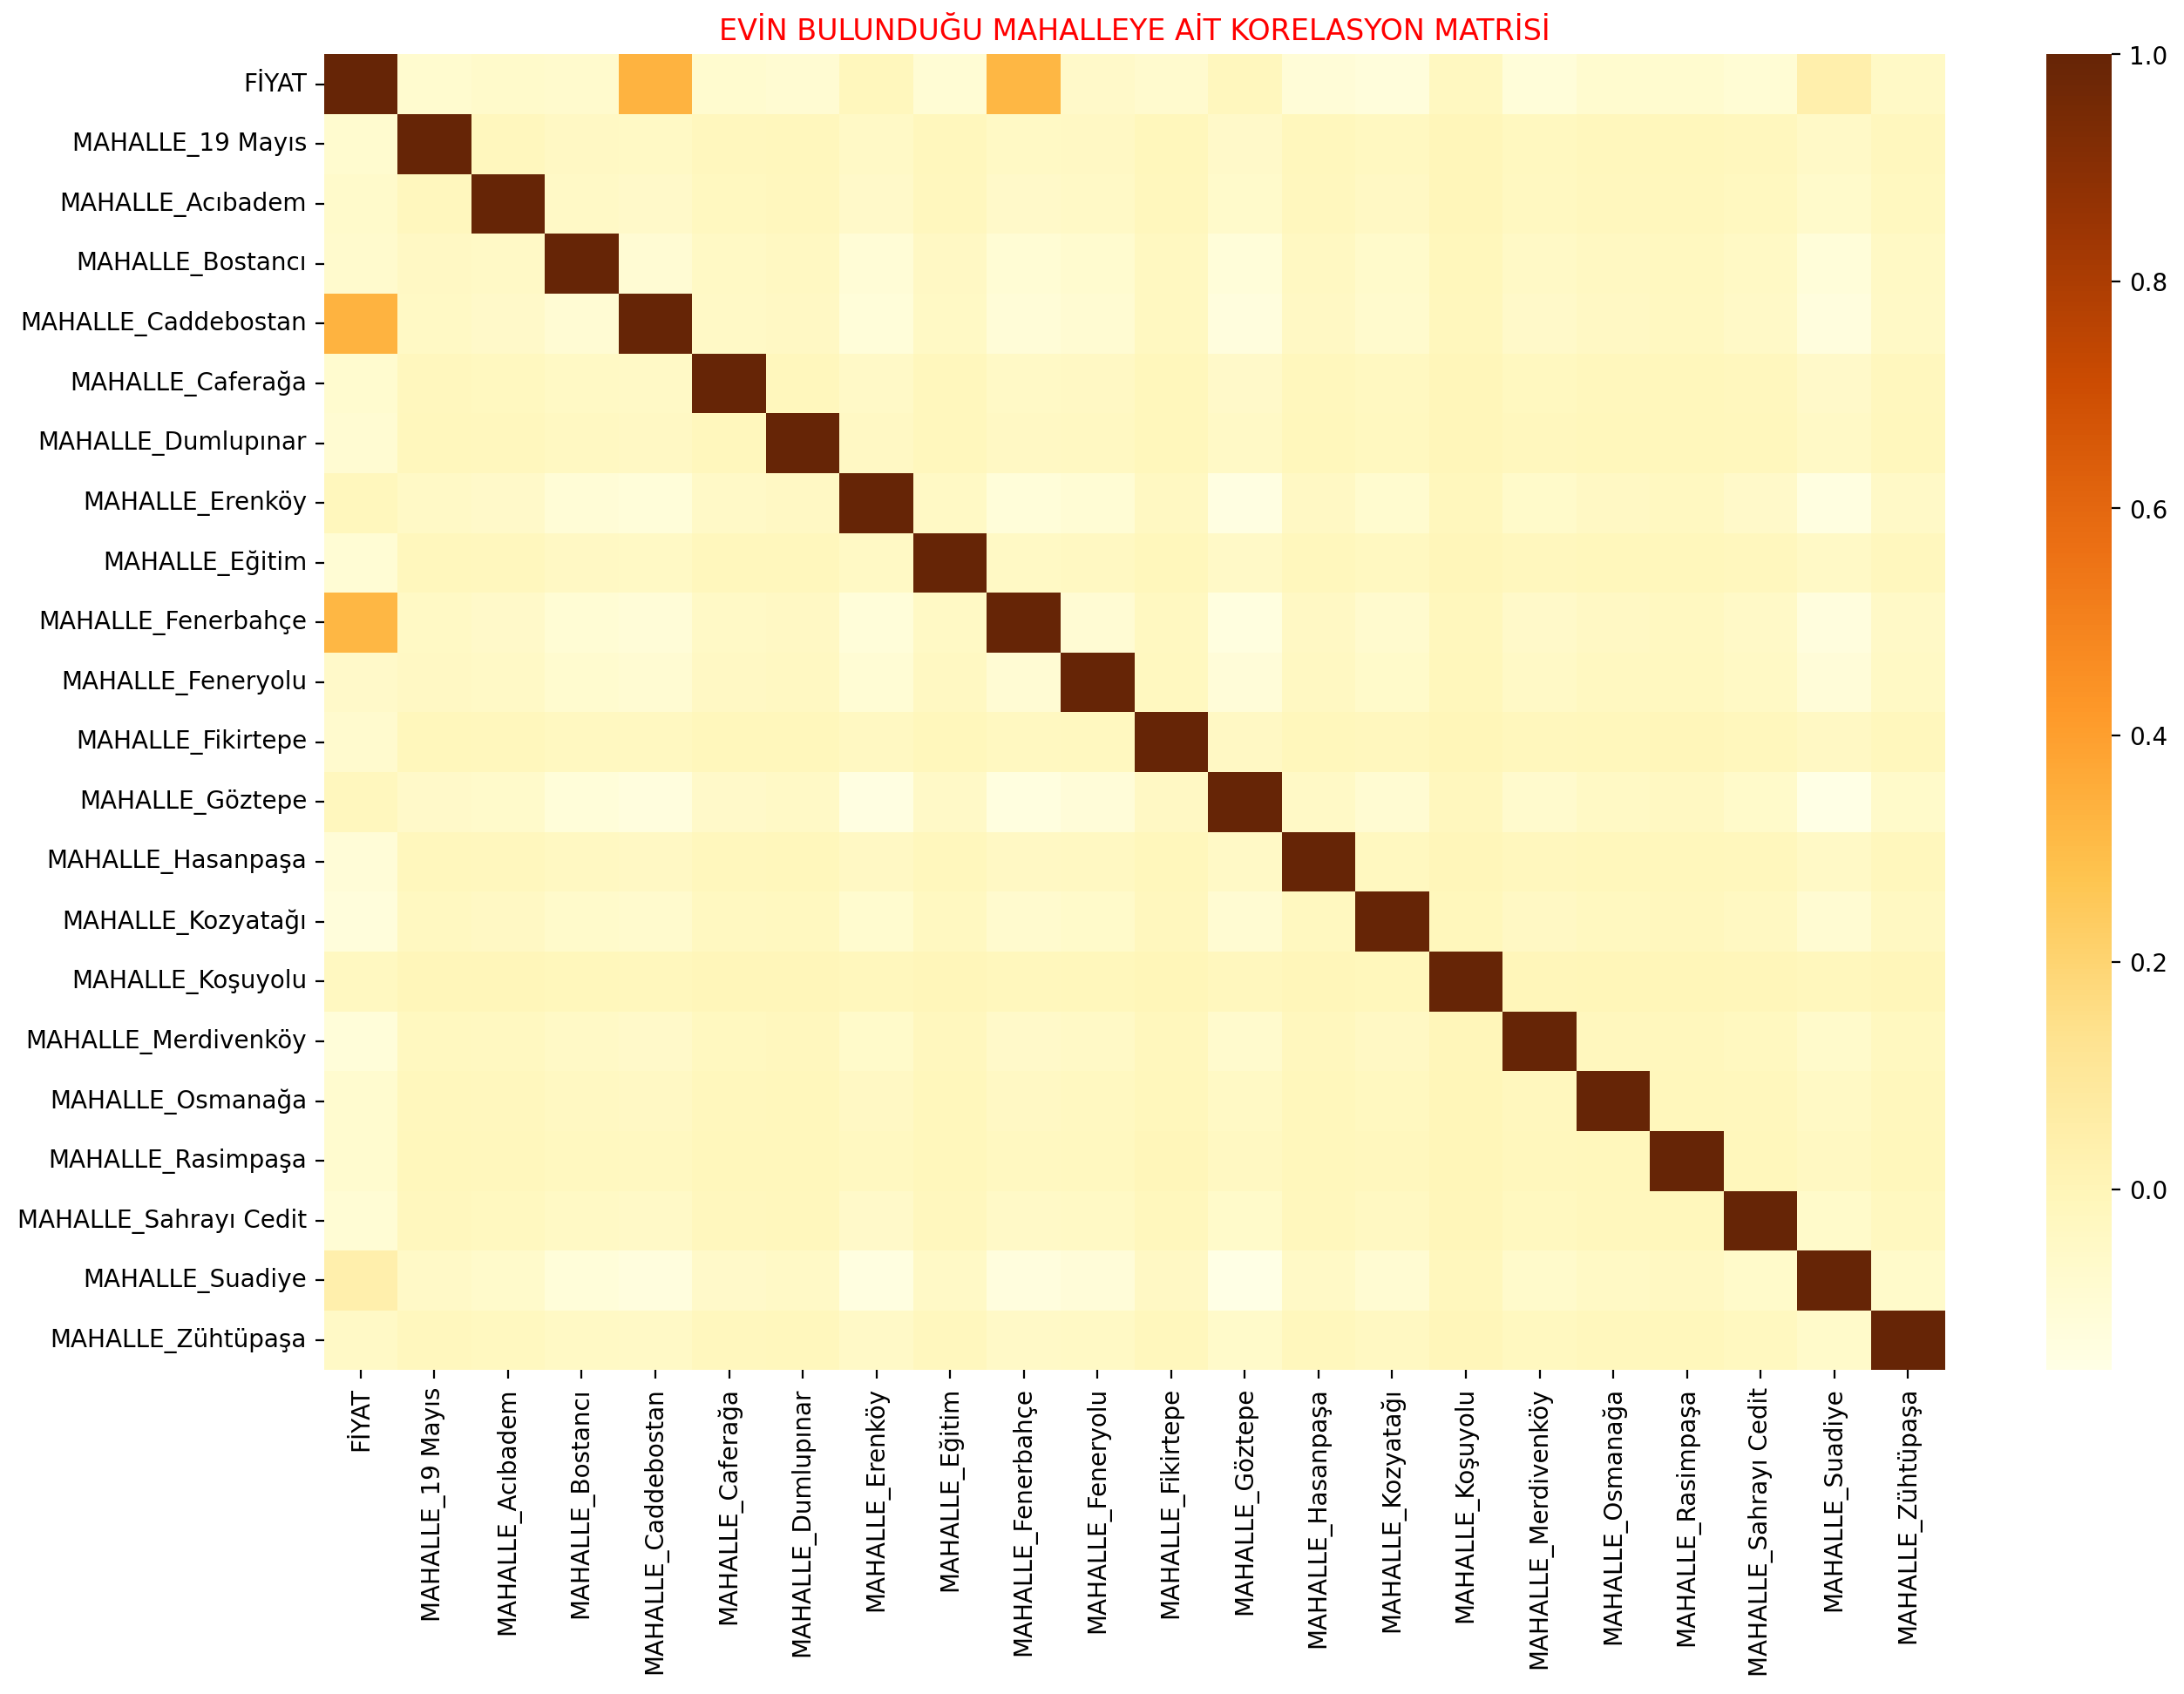

In [ ]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("EVİN BULUNDUĞU MAHALLEYE AİT KORELASYON MATRİSİ", c="red")
sns.heatmap(other_df.corr(), cmap="YlOrBr")

In [ ]:
X = new_df.iloc[:,1:]
Y = new_df.iloc[:,:1]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.25, random_state=20)

In [ ]:
lr_model = LinearRegression()

lr_model.fit(x_train,y_train)
pred = lr_model.predict(x_val)

ValueError: could not convert string to float: '4+1'

In [ ]:
print("MSE Value: ", np.mean((pred - y_val)**2), "\n")

print("R^2 Score Value (Test): ", lr_model.score(x_test, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model.score(x_val, y_val), "\n")

print("Coefficients:\n", lr_model.coef_)

In [ ]:
x = new_df.loc[:,["NET(m²)", "BRÜT(m²)", "ODA SAYISI", "SALON SAYISI"]]
y = new_df.iloc[:,:1]

In [ ]:
lr_model = LinearRegression()

lr_model.fit(X_train, Y_train)
new_pred = lr_model.predict(X_val)

In [ ]:
print("MSE Value: ", np.mean((new_pred - Y_val)**2), "\n")

print("R^2 Score Value (Test): ", lr_model.score(X_test, Y_test), "\n")
S
print("R^2 Score Value (Validation): ", lr_model.score(X_val, Y_val), "\n")

print("Coefficients:\n", lr_model.coef_)

In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.values)
x_test_scaled = scaler.fit_transform(x_test.values)
x_val_scaled = scaler.fit_transform(x_val.values)

lr_model_ridge = Ridge(alpha=0.05, normalize=True)

lr_model_ridge.fit(x_train_scaled, y_train)

print("R^2 Score Value (Test): ", lr_model_ridge.score(x_test_scaled, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model_ridge.score(x_val_scaled, y_val))

In [ ]:
lr_model_lasso = Lasso(alpha=0.05, normalize=True)

lr_model_lasso.fit(x_train_scaled, y_train)

print("R^2 Score Value (Test): ", lr_model_lasso.score(x_test_scaled, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model_lasso.score(x_val_scaled, y_val))